<a href="https://colab.research.google.com/github/FUenal/pythonist/blob/main/Predictors_of_Climate_Change_Policy_Support_A_XGBoost_Algorithm_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictors of Climate Change Policy Support: A XGBoost Algorithm Approach

This webpage is a companion piece to the paper entitled: Predictors of Climate Change Policy Support: A Machine Learning Approach. A pre-print of the manuscript can be found [online](https://psyarxiv.com/65tx4/).

In this full-stack data science project, I will analyze the most important predictors of climate change policy support. The data comes from the European Social Survey 2016 (8th round). After a contextual [introduction](#introduction), I will start with [data selection and cleaning](#data), followed by interactive [visualization and exploration](#viz). In the second half of the project, I will gain deeper insights by employing [statistical inference](#stats) and [machine learning](#ml) methods to analyze the most important individual-level predictors of climate change policy support.

**Pleas note that some of the following information is part of an academic manuscript which is currently in peer-review process.**


## Table of contents
1. [Introduction](#introduction)
2. [Data selection and cleaning](#data)
3. [Exploratory data analysis and visualization](#viz)
    *  [Creating the visualization](#viz1)
    *  [Exploring trends](#viz2)         
4. [Hypothesis testing and effect sizes](#stats)
    * [Theoretical background](#stats1)
    * [Performing tests](#stats2)
5. [Predicting answers with machine learning](#ml)
    * [Data preparation](#ml1)
    * [Interpretation of linear models](#ml2)
    * [Interpretation of gradient-boosted ensembles](#ml3)
6. [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>
Fossil-fueled climate change poses a significant threat to planetary and civilizational health (IPCC 2022; Kemp et al., 2022). Mitigating climate change requires enacting far-reaching climate policies such as restrictive supply-side policies (e.g., fossil-fuel non-proliferation treaty, limitations, moratoria, and bans; Newell & Simms, 2019) as well as regulatory demand-side policies (e.g., fossil-fuel taxation, incentivizing energy efficiency) that facilitate behavior changes towards low-carbon-intensive lifestyles. Demand-side policies that tax polluting sources of energy, such as fossil fuels, are among the most effective ways to curb emissions that harm the planet and human health (Carl & Fedor, 2016; Stoddard et al. 2021). Moreover, the income generated by fossil fuel taxation can be used to accelerate the low-carbon transition. However, 70% of energy-related CO2 emissions from advanced and emerging economies are entirely untaxed, offering little incentive to move to cleaner energy (OECD, 2019). Though the immense potential of fossil fuel taxation policies is undeniable, public opinion research also indicates that support for them varies greatly across Europe (e.g., Dechezleprêtre et al., 2022; Fairbrother, Sevä, & Kulin, 2019; Harring, Sverker, & Matti, 2019).

Prior research has significantly enriched our comprehension of the intricacy inherent in support for climate change policies. However, the available research has yet to identify the most important and robust factors associated with this support (or lack thereof) amongst the plethora of factors that have been investigated so far (but see Lee et al., 2015 for climate change risk perceptions). For example, analysis techniques (e.g., linear regression, latent class analysis, multi-level regression) typically used in previous research are suboptimal for comparing the predictive importance of a larger number of constructs simultaneously (Lee et al., 2015; Yarkoni & Westfal, 2017). These methods also readily permit the erroneous overfitting of statistical models to specific datasets. The consequence of these practical research constraints is that previous research has not been able to meaningfully compare the relative importance of the growing list of constructs associated with climate change mitigation policy preferences (e.g., Fairbrother, Sevä, & Kulin, 2019; Goldberg et al., 2021; Kàcha et al., 2022; Dechezleprêtre et al., 2022; Poortinga et al., 2019). Thus, at present, one of the key challenges to understanding the factors associated with climate change policy preferences is to make the existing knowledge cumulative by identifying the strongest and most robust predictors among the many. At the same time, relatively little research has explored cross-national differences in climate change mitigation policy support (but see, Dechezleprêtre et al., 2022; Fairbrother, Sevä, & Kulin, 2019; Uenal et al., 2020), which is important because the influence of factors may differ between countries.

Using a machine learning approach (i.e., XGBoost) on data from nationally representative samples from 22 European countries and Israel, in the manuscript, we provide the first large-scale assessment of the highest number of factors (151 predictors) underlying climate change mitigation policy preferences to date. The data come from the [European Social Survey 8 (2016)](https://www.europeansocialsurvey.org/data/download.html?r=8). The ESS8 contains a measure of climate change mitigation policy preferences by asking ‘To what extent are you in favor or against the following policies in [country] to reduce climate change: increasing fossil-fuel taxation?’.


## Data selection and cleaning <a name="data"></a>
First, we load the necessary libraries and take a look at the data files.

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # for data reading and processing
import scipy.stats # functions for statistical analysis
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# to avoid displaying warnings in notebook (still visible in console)
import warnings
warnings.filterwarnings('ignore')

# getting data from drive
from google.colab import drive
drive.mount('/content/drive')

# Input data files are available in the "../input/" directory.
# list all files under the input directory
print("Files in this folder:")
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in this folder:
/content/drive/MyDrive/Datasets/ESS8e02.1.pdf
/content/drive/MyDrive/Datasets/ESS8e02.1_F1.csv
/content/drive/MyDrive/Datasets/variables.csv


Let's start with loading the data and taking a first birds-eye view.

In [ ]:
# Loading data into dataframe
df = pd.read_csv("/content/drive/MyDrive/Datasets/ESS8e02.1_F1.csv")
print("Here is an overview of the available dataset")
df.info()

Here is an overview of the available dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44387 entries, 0 to 44386
Columns: 534 entries, name to pweight
dtypes: float64(226), int64(298), object(10)
memory usage: 180.8+ MB


We are presented with a sizable dataset, comprising 534 columns, each representing a survey question. In total, there are 44,387 rows, each corresponding to an individual surveyed. It's important to remember that behind these numbers are real people who took the time to participate in this survey. They provided answers to a range of questions, some of which may have been challenging to contemplate. The insights gained from this data can be used to enhance our knowledge on a variety of current social and environmental issues of importance.

Regarding **data selection and cleaning**, there are several key considerations:

- The variables are categorized into topics like *media and social trust*, *politics*, *subjective well-being*, *social issues*, and *climate change*. These contain vital information, alongside administrative and interview code variables, which won't be considered here. Additionally, specific country-related variables (e.g., pertaining to political parties) will be excluded.

- We have sampling stratification weights for individuals and population weights for countries. While these are typically used to calculate average aggregated values, they won't be applied in this analysis. This decision stems from the interest in examining the entire data distribution and preserving the integrity of individual responses.

- The ordinal responses to questions do not consistently follow the same scale (e.g., 1 to 5 vs. 0 to 10), and some scales appear to be reversed compared to the question's phrasing. This may have been done to prevent leading questions. When appropriate, I will reverse the order of these scales. Please consult the survey documentation for further details.

- Invalid responses (e.g., refusal, don't know, missing) are encoded with numbers like 66, 77, 99 for larger scales, and 6, 7, 8, 9 for smaller scales, with occasional mixed encoding. The survey's encoding design exhibits a variety of approaches, possibly due to multiple groups contributing to the survey's creation.

Given the intricacy of these tasks, I have meticulously reviewed the documentation, gathered all necessary information for cleaning, and saved it in a file named `variables.csv`. Let's start by loading this file.

In [ ]:
# read in variables.csv datasheet and show first 10 rows
all_variables = pd.read_csv("/content/drive/MyDrive/Datasets/variables.csv")
all_variables.sample(10)

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
192,wrtcfl,"How worried, energy supply interrupted by tech...",no,ordinal,discrete,numeric-1.0,43829,558,D15-17 How worried are you that energy supplie...,Group Climate change
528,inwdde,"End of interview, day of month",no,continuous,continuous,numeric-2.0,44377,10,"R7 End of interview, day of month",Group Administrative variables
235,ub20unp,"Someone aged 20-25, unemployment benefit if tu...",no,ordinal,discrete,numeric-1.0,10304,34083,ub20unp?,Group Welfare attitudes
487,edlvmdse,"Mother's highest level of education, Sweden",yes,nominal,discrete,numeric-4.0,1456,42931,F56SE What is the highest level of education y...,Group Socio-demographics
296,marstfi,"Legal marital status, Finland",no,nominal,discrete,numeric-2.0,1024,43363,F11FI This question is about your legal marita...,Group Socio-demographics
190,wrntdis,"How worried, energy supply interrupted by natu...",no,ordinal,discrete,numeric-1.0,43925,462,D15-17 How worried are you that energy supplie...,Group Climate change
135,rlgdehu,Religion or denomination belonging to in the p...,yes,nominal,discrete,numeric-4.0,52,44335,C14HU Which one? (Hungary),"Group Subjective well-being, social exclusion,..."
53,sgnptit,Signed petition last 12 months,no,binary,discrete,numeric-1.0,44199,188,B15-22 There are different ways of trying to i...,Group Politics
344,dngdk,Doing last 7 days: don't know,no,binary,discrete,numeric-1.0,44387,0,"F17a Using this card, which of these descripti...",Group Socio-demographics
109,atchctr,How emotionally attached to [country],no,ordinal,discrete,numeric-2.0,44152,235,C9 How emotionally attached do you feel to [co...,"Group Subjective well-being, social exclusion,..."


We have obtained the variables along with their names and concise question summaries as labels. From this, we can ascertain whether they are continuous or discrete, ordinal or nominal, or binary in nature. My focus lies in identifying trends, so I will concentrate on questions featuring an ordinal scale, such as *"On a scale of 0 to 10, how much do you agree with..."*. Binary yes-or-no questions won't be pertinent for my analysis and will be excluded. Similarly, I will not consider nominal responses (e.g., occupation, educational level, political party affiliation, country of origin, marital status, etc.), except for a few exceptions. Specifically, I'm interested in discerning disparities among countries (`cntry`) and genders (`gndr`), noting that only 9 respondents in the entire survey did not identify as either male or female, so we will focus exclusively on these two genders. Additionally, I will include continuous variables such as age (`agea`), years of completed full-time education (`eduyrs`), daily minutes spent on news consumption (`nwspol`), and daily minutes of internet usage (`netustm`).

In [ ]:
# get the variables that are not country specific, ordinal, and not part of the admistrative group
ordinal = all_variables.query("Country_specific == \"no\" & Scale_type == \"ordinal\" and Group != \"Group Administrative variables\"")

# get the continous variables mentioned above
continious = all_variables.query( "Name in [\"agea\",\"eduyrs\",\"nwspol\",\"netustm\"]")

# get the nominal variables mentioned above
nominal = all_variables.query( "Name in [\"cntry\",\"gndr\"]")

# append them to one data frame
variables = pd.concat([nominal,continious,ordinal]).reset_index(drop=True)
variables.head(10)

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
0,cntry,Country,no,nominal,discrete,character-2,44387,0,5 Country,Group Country
1,gndr,Gender,no,nominal,discrete,numeric-1.0,44378,9,"F21 CODE SEX, respondent","Group Gender, Year of birth and Household grid"
2,nwspol,"News about politics and current affairs, watch...",no,continuous,continuous,numeric-4.0,43863,524,"A1 On a typical day, about how much time do yo...",Group Media and social trust
3,netustm,"Internet use, how much time on typical day, in...",no,continuous,continuous,numeric-4.0,30113,14274,"A3 On a typical day, about how much time do yo...",Group Media and social trust
4,agea,"Age of respondent, calculated",no,continuous,continuous,numeric-4.0,44232,155,"F31b Age of respondent, calculated","Group Gender, Year of birth and Household grid"
5,eduyrs,Years of full-time education completed,no,continuous,continuous,numeric-2.0,43963,424,F16 About how many years of education have you...,Group Socio-demographics
6,netusoft,"Internet use, how often",no,ordinal,discrete,numeric-1.0,44338,49,A2 People can use the internet on different de...,Group Media and social trust
7,ppltrst,Most people can be trusted or you can't be too...,no,ordinal,discrete,numeric-2.0,44272,115,"A4 Using this card, generally speaking, would ...",Group Media and social trust
8,pplfair,"Most people try to take advantage of you, or t...",no,ordinal,discrete,numeric-2.0,44072,315,"A5 Using this card, do you think that most peo...",Group Media and social trust
9,pplhlp,Most of the time people helpful or mostly look...,no,ordinal,discrete,numeric-2.0,44211,176,A6 Would you say that most of the time people ...,Group Media and social trust


We now have all the necessary variables. In the `Format` column, we find values like `numeric-1.0`, `numeric-2.0`, and `numeric-4.0`, indicating the maximum number of digits a variable's value can possess. This information will be instrumental in filtering out invalid responses, which are typically encoded as values greater than or equal to 6, 66, or 6666, respectively. For the small ordinal scales, it should suffice to discard values exceeding 5, while for the larger ordinal scales, values above 10 should be omitted. It's worth noting an exception applies to questions in the "Human Values" category, where 6 is a valid answer in a scale of 1 to 6, and invalid answers commence from 7 onwards. This serves as a reminder of the intricacies that real-world data can present, underscoring the importance of meticulous attention to detail.

In [ ]:
# get the variable names grouped by the means they have encoded invalid answers
humval = variables.query("Group == \"Group Human values\"").Name
num1 = variables.query("Format == \"numeric-1.0\" & Group != \"Group Human values\" ").Name
num2 = variables.query("Format == \"numeric-2.0\" & Name != \"eduyrs\" ").Name
edy = ["eduyrs"]
num4 = variables.query("Format == \"numeric-4.0\" ").Name

Now, we will subset the chosen variables and store them separately for further usage.

In [ ]:
# drop the 9 people who identified neither as male nor as female
df = df[df.gndr<=2]

# select all the variables that we chose above
ess = df[variables.Name]
ess.sample(10)

,cntry,gndr,nwspol,netustm,agea,eduyrs,netusoft,ppltrst,pplfair,pplhlp,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
39911,RU,1,120,6666,70,15,1,0,3,3,...,1,2,1,3,1,2,1,1,1,3
41450,RU,2,60,6666,70,16,1,1,2,3,...,2,3,2,5,2,5,1,2,2,3
34379,NL,2,60,120,72,10,5,7,7,8,...,1,6,2,5,5,6,1,1,1,1
11297,EE,1,180,6666,58,13,3,4,5,5,...,3,4,4,4,3,3,2,3,2,4
39734,RU,2,180,6666,68,11,1,6,8,5,...,2,5,2,5,2,3,2,2,2,5
29250,IT,1,180,120,39,16,5,6,6,6,...,2,2,2,4,3,4,2,2,3,2
36895,PL,1,240,360,49,19,5,3,4,2,...,2,3,2,5,2,3,2,2,2,5
40228,RU,1,60,6666,59,11,3,6,4,4,...,3,3,2,5,2,2,3,3,2,6
2146,BE,2,60,210,42,12,5,7,3,5,...,2,4,4,6,3,3,1,1,1,1
25444,IL,1,0,120,50,15,5,1,88,0,...,2,3,5,5,7,2,3,2,4,3


In [ ]:
# checking for missing values
print(f"Missing values: \n{ess.isna().sum()[ess.isna().sum() > 0]}")

Missing values: 
rfgfrpc    1614
eusclbf    8931
eudcnbf    8931
lknemny    2010
dtype: int64


We've already identified some missing values in the following variables:

- `rfgfrpc`: Majority of refugee applicants not genuinely fearful of persecution in their own countries
- `eusclbf`: Position against or in favor of a European Union-wide social benefit scheme
- `eudcnbf`: Influence of EU decisions on the level of benefits in \[country\], whether they increase or decrease
- `lknemny`: Likelihood of facing insufficient funds for household necessities in the next 12 months

We'll now introduce additional missing values by replacing the invalid response codes with NaNs. These will be handled later in visualization or modeling processes, either by exclusion, imputation, or other appropriate approaches.

In [ ]:
# replacing invalid responses (as discussed above) with NaN
for group, cutoff in zip([humval,num1,num2,edy,num4],[7,6,11,66,6666]):
    for var in group:
        ess.loc[:,var].where(ess[var]<cutoff,other=np.nan,inplace=True)


In [ ]:
# checking for missing values one more time
print(f"Missing values after removing invalid answers: {ess.isna().sum()[ess.isna().sum() > 0]}")

Missing values after removing invalid answers: nwspol        524
netustm     14272
eduyrs        421
netusoft       49
ppltrst       115
            ...  
iprspot       996
iplylfr       771
impenv        753
imptrad       748
impfun        818
Length: 153, dtype: int64


Excellent, it appears that we've successfully substituted all invalid responses with NaN values. Now, let's proceed to reverse the scales that require adjustment. I've compiled a list containing the corresponding variables. For more information, please refer to the survey's documentation. Additionally, there's a variable named `lrscale` representing one's position on the political left-right scale, with 0 signifying very left and 10 indicating very right. This variable does not require reversal, as the associated question simply asks, *"In politics people sometimes talk of 'left' and 'right'. \[...\] Where would you place yourself on this scale \[...\]?"*. I'm mentioning this here for clarity in case anyone has questions about it.

In [ ]:
# list of variable for which the scale seems reversed with respect to how the according question we phrased
reverse = ["hlthhmp", "imsmetn", "imdfetn", "impcntr", "aesfdrk", "clmchng", "hincfel", "gincdif", "mnrgtjb", "freehms",
           "hmsfmlsh", "hmsacld", "health","gvrfgap", "rfgfrpc", "rfgbfml", "elgcoal", "elgngas", "elghydr","elgnuc",
           "elgsun", "elgwind", "elgbio", "inctxff", "sbsrnen","banhhap", "dfincac", "smdfslv", "sbstrec", "sbprvpv",
           "sbeqsoc", "sbbsntx", "sblazy", "sblwcoa", "imsclbn", "uentrjb", "bennent", "eudcnbf", "domicil", "ipcrtiv",
           "imprich", "ipeqopt", "ipshabt", "impsafe", "impdiff","ipfrule", "ipudrst", "ipmodst", "ipgdtim", "impfree",
           "iphlppl","ipsuces", "ipstrgv", "ipadvnt", "ipbhprp", "iprspot", "iplylfr","impenv", "imptrad", "impfun",
           "rlgatnd", "pray", "ccgdbd"]

# reverse the ranges for list of items
for var in reverse:
    upp = int(ess[var].max())
    low = int(ess[var].min())
    ess[var].replace(dict(zip(range(low,upp+1),range(upp,low-1,-1))),inplace=True)

Fantastic! So, in case that whatever we do next can handle NaNs, we are done with the wrangling for now. Let's take a quick look at the wrangled data.

In [ ]:
# Glimpse first 10 rows of data
ess.sample(10)

,cntry,gndr,nwspol,netustm,agea,eduyrs,netusoft,ppltrst,pplfair,pplhlp,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
35426,NO,1,0.0,90.0,51,13.0,5.0,3.0,5.0,5.0,...,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0
41815,SE,1,240.0,90.0,70,8.0,5.0,5.0,5.0,4.0,...,4.0,2.0,3.0,1.0,6.0,3.0,6.0,6.0,3.0,2.0
3230,BE,1,30.0,60.0,55,15.0,5.0,7.0,3.0,3.0,...,5.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0
30710,IT,1,105.0,180.0,38,13.0,5.0,7.0,3.0,4.0,...,6.0,5.0,5.0,1.0,5.0,3.0,6.0,5.0,6.0,2.0
38414,PT,1,60.0,120.0,55,14.0,5.0,1.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,2.0,6.0,3.0,3.0,6.0
11590,EE,1,60.0,240.0,31,17.0,5.0,5.0,5.0,7.0,...,5.0,2.0,5.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0
14007,ES,2,180.0,60.0,49,10.0,5.0,2.0,7.0,1.0,...,6.0,2.0,6.0,2.0,6.0,2.0,6.0,6.0,6.0,1.0
28542,IT,1,270.0,NaN,69,6.0,1.0,5.0,5.0,5.0,...,5.0,5.0,2.0,1.0,5.0,4.0,5.0,6.0,5.0,1.0
41351,RU,1,40.0,NaN,65,12.0,1.0,6.0,7.0,4.0,...,4.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,5.0
12804,ES,1,90.0,180.0,24,18.0,5.0,8.0,9.0,3.0,...,5.0,4.0,3.0,4.0,4.0,2.0,5.0,5.0,4.0,4.0


## Exploratory data analysis and visualization <a name="viz"></a>
With the data now cleaned, our aim is to unravel the narrative it conveys. We're eager to examine the responses to these myriad questions, discerning variations by country and gender, and exploring correlations between different answers. Which country reports the highest levels of support for climate change policies? Who exhibits the greatest trust in politics and assumes the most responsibility for climate change? Additionally, are there disparities in opinions between women and men?

To tackle these inquiries effectively, we'll employ interactive visualizations. This approach allows us to navigate through the data, select various variables, and visually discern how responses diverge across different countries. I've crafted a `ess_plot()` function below, utilizing Python's Bokeh library to generate such interactive visualizations. Feel free to peruse the code in detail, or if you find it less engaging, you can simply click [here](#next) to move on to the next cell.

### Creating the visualization <a name="viz1"></a>

In [ ]:
def ess_plot(var1="lrscale",var2="inctxff"):
    """
    This function generates an interactive graphic displaying insights derived from ESS8 data.
    It comprises three distinct sub-plots:
        - A line graph depicting the median of one variable in relation to discrete bins of another variable. This chart is filterable by country.
        - A bar chart illustrating the mean of the first variable for each country.
        - Another bar chart showcasing the mean of the second variable for each country.
    When hovering over the graphs, detailed values will be displayed for further examination.

    Parameters
    ----------
    var1, var2 : string
            Names of the two variables to compare initially.
            (variables can be changed interactively in the plot)

    Returns
    -------
    No returns
    """
    # import libraries and modules
    import math
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show, push_notebook
    output_notebook()
    from bokeh.models import Band
    from bokeh.models import Range1d
    from bokeh.models import FactorRange
    from bokeh.models import HoverTool
    from bokeh.models import ColumnDataSource
    from bokeh.layouts import row
    from ipywidgets import interact

    # width and height for subplots
    p_width ,p_height = 450, 450

    #  X and Y variable values
    x = var1#"lrscale"
    y = var2#"inctxff"
    # country filter variable and dictionary
    cntry = "All countries"
    cntry_dict = dict(zip(
                          ["All countries","Austria","Belgium","Switzerland","Czech republic","Germany","Estonia","Spain",
                           "Finland","France","United Kingdom","Hungary","Ireland","Israel","Iceland","Italy","Lithuania",
                           "Netherlands","Norway","Poland","Portugal","Russia","Sweden","Slovenia"],
                          ["All countries",'AT', 'BE', 'CH', 'CZ', 'DE', 'EE', 'ES', 'FI', 'FR', 'GB', 'HU','IE', 'IL',
                           'IS', 'IT', 'LT', 'NL', 'NO', 'PL', 'PT', 'RU', 'SE','SI']))

    # boolean False for first setup, later True when plot is updated
    setup = False
    # h is a notebook handle which will be inistialized later and used for updating the plot
    global h
    h = None

    def calc_median_iqr():
        """Calculates medians and quartiles for plotting"""
        nonlocal x
        nonlocal y
        nonlocal cntry

        # get a copy of the variable columns we want to look at
        if cntry == "All countries":
            ess_c = ess[[x,y]].copy()
        else:
            c = cntry_dict[cntry]
            ess_c = ess.query("cntry == @c")[[x,y]].copy()

        # get the y-range
        yrange = (ess_c[y].min(),ess_c[y].max())

        # jitter the y-values
        ess_c[y] = ess_c[y] + np.random.uniform(-0.5,0.5,len(ess_c[y]))

        # remove NaNs from x-values because bokeh apparently has a problem converting them to JSON
        xs = sorted([n for n in ess_c[x].unique() if not math.isnan(n)])

        # get x-range
        xrange = (min(xs),max(xs))

        # calculate the median, first, and third quartile of the y-values for each x-value
        medians = [ess_c.loc[ess_c[x]==i,y].median() for i in xs]
        Q3 = [ess_c.loc[ess_c[x]==i,y].quantile(0.75) for i in xs]
        Q1 = [ess_c.loc[ess_c[x]==i,y].quantile(0.25) for i in xs]

        return yrange, xrange, xs, medians, Q1, Q3

    #  #  #  #
    # Set up the different elements of the plot
    #  #  #  #

    # # # # Plot 1: Line plot X vs. Y

    # calculating median, Q1, Q3 etc.
    yrange, xrange, xs, medians, Q1, Q3 = calc_median_iqr()

    # setting up the data source
    source1 = ColumnDataSource(dict(x = xs,
                                        medians = medians,
                                        Q3 = Q3,
                                        Q1 = Q1,))

    # creating figure 1 for X vs. Y plot
    p1 = figure(plot_width= p_width, plot_height=p_height,
               title=cntry,y_range=yrange,x_range=xrange,
               tools="hover", tooltips="@x -> @medians")

    # line plot that shows the median +/- inter-quartile range of one variable as a function of another variable
    p1.line("x", "medians", color="navy",line_width = 3,source=source1,legend="Median\n+/- IQR")

    # plot the inter-quartile range (IQR) as a band
    band = Band(base='x', lower='Q1', upper='Q3', source=source1,
                  level='underlay', fill_color="lightblue",fill_alpha=.8, line_width=1, line_color='navy',)
    p1.add_layout(band)
    p1.legend.location = "bottom_left"

    # # # # Plot 2: Bar plot for X

    def calc_cntry_X():
        """Calculates variable X for all countries"""
        nonlocal x

        # get mean and standard deviation of X for each country, also grouped by gender
        gr = ess.groupby("cntry")[x].agg(["mean","std"])
        mean = gr["mean"]
        std = gr["std"]
        gr = ess.groupby(["gndr","cntry"])[x].agg(["mean","std"])
        mean_f = gr.loc[2,"mean"]
        std_f = gr.loc[2,"std"]
        mean_m = gr.loc[1,"mean"]
        std_m = gr.loc[1,"std"]

        # get list of coutries without "all countries"
        cntry_list = list(cntry_dict.keys())[1:]

        # sort so that the highest mean value is in front
        zipped = zip(mean, std, mean_f, std_f, mean_m, std_m, cntry_list)
        zipped = sorted(zipped,reverse=True)
        mean, std, mean_f, std_f, mean_m, std_m, cntry_list = zip(*zipped)

        return mean, std, mean_f, std_f, mean_m, std_m, cntry_list

    # calculating means and stds
    xmean, xstd, xmean_f, xstd_f, xmean_m, xstd_m, xcntry_list = calc_cntry_X()

    # setting up the data source 2
    source2 = ColumnDataSource(dict(    cntry = xcntry_list,
                                        mean = xmean,
                                        std = xstd,
                                        std_h = [m+s for m,s in zip(xmean,xstd)],
                                        std_l = [m-s for m,s in zip(xmean,xstd)],
                                        mean_f = xmean_f,
                                        std_f = xstd_f,
                                        mean_m = xmean_m,
                                        std_m = xstd_m,))

    # second plot: bar chart for all countries
    p2 = figure(plot_width=p_width , plot_height=p_height,
               title=variables.query("Name == @x").Label.values[0],
               x_range = xcntry_list,
               y_range = (0,max(xmean)+max(xstd)+0.5),
               tools="")

    # bar plot that shows the variable for each country
    bars2 = p2.vbar(x='cntry', top='mean', width=0.8,source=source2,legend="Mean +/- Std.Dev.",
            fill_color='lightblue', fill_alpha=0.8, line_color="navy",
            hover_fill_color="orange", hover_alpha= 0.8, hover_line_color="darkred")

    # adding lines to represent the spread given by the standard deviation
    p2.segment(x0='cntry', y0="std_l", x1='cntry', y1="std_h", line_width=2, color="black",source=source2)

    # setting up the hover tool
    p2.add_tools(HoverTool(tooltips=[("Country", "@cntry"),
                                     ("All", "@mean{0.2f} +/- @std{0.2f}"),
                                     ("Female", "@mean_f{0.2f} +/- @std_f{0.2f}"),
                                     ("Male", "@mean_m{0.2f} +/- @std_m{0.2f}")],
                           renderers=[bars2]))

    # adjusting legend location and rotate country labels
    p2.legend.location = "top_right"
    p2.xaxis.major_label_orientation = math.pi/2

    # # # # Plot 3: Bar plot for Y

    def calc_cntry_Y():
        """Calculates variable Y for all countries"""
        nonlocal y

        # get mean and standard deviation of X for each country, also grouped by gender
        gr = ess.groupby("cntry")[y].agg(["mean","std"])
        mean = gr["mean"]
        std = gr["std"]
        gr = ess.groupby(["gndr","cntry"])[y].agg(["mean","std"])
        mean_f = gr.loc[2,"mean"]
        std_f = gr.loc[2,"std"]
        mean_m = gr.loc[1,"mean"]
        std_m = gr.loc[1,"std"]

        # get list of coutries without "all countries"
        cntry_list = list(cntry_dict.keys())[1:]

        # sort so that the highest mean value is in front
        zipped = zip(mean, std, mean_f, std_f, mean_m, std_m, cntry_list)
        zipped = sorted(zipped,reverse=True)
        mean, std, mean_f, std_f, mean_m, std_m, cntry_list = zip(*zipped)

        return mean, std, mean_f, std_f, mean_m, std_m, cntry_list

    # calculating means and stds
    ymean, ystd, ymean_f, ystd_f, ymean_m, ystd_m, ycntry_list = calc_cntry_Y()

    # setting up the data source 3
    source3 = ColumnDataSource(dict(    cntry = ycntry_list,
                                        mean = ymean,
                                        std = ystd,
                                        std_h = [m+s for m,s in zip(ymean,ystd)],
                                        std_l = [m-s for m,s in zip(ymean,ystd)],
                                        mean_f = ymean_f,
                                        std_f = ystd_f,
                                        mean_m = ymean_m,
                                        std_m = ystd_m,))

    # third plot: bar chart for all countries
    p3 = figure(plot_width=p_width , plot_height=p_height,
               title=variables.query("Name == @y").Label.values[0],
               x_range = ycntry_list,
               y_range = (0,max(ymean)+max(ystd)+0.5),
               tools="")

    # bar plot that shows the variable for each country
    bars3 = p3.vbar(x='cntry', top='mean', width=0.8,source=source3,legend="Mean +/- Std.Dev.",
            fill_color='lightblue', fill_alpha=0.8, line_color="navy",
            hover_fill_color="orange", hover_alpha= 0.8, hover_line_color="darkred")

    # adding lines to represent the spread given by the standard deviation
    p3.segment(x0='cntry', y0="std_l", x1='cntry', y1="std_h", line_width=2, color="black",source=source3)

    # setting up the hover tool
    p3.add_tools(HoverTool(tooltips=[("Country", "@cntry"),
                                     ("All", "@mean{0.2f} +/- @std{0.2f}"),
                                     ("Female", "@mean_f{0.2f} +/- @std_f{0.2f}"),
                                     ("Male", "@mean_m{0.2f} +/- @std_m{0.2f}")],
                           renderers=[bars3]))

    # adjust legend location and rotate country labels
    p3.legend.location = "top_right"
    p3.xaxis.major_label_orientation = math.pi/2

    def plot_styling(plots):
        """Styles the plot in seaborn-like style"""

        # various commands for styling the plot, I'm trying to give it the "seaborn" look which I like a lot
        for p in plots:
            p.background_fill_color="lightgray"
            p.background_fill_alpha=0.8
            p.axis.axis_line_color ="white"
            p.axis.minor_tick_line_color ="white"
            p.axis.major_tick_line_color ="white"
            p.legend.background_fill_color = "lightgray"
            p.legend.background_fill_alpha = 0.6
            p.legend.border_line_color="navy"
            p.grid.grid_line_color = "white"
            p.grid.grid_line_alpha = 0.8
            p.axis.major_label_text_font_size = "10pt"
            p.toolbar_location = None
            p.min_border_right = 10

    # update functions for dropdown variable selecters
    def updateX(VariableX):
        nonlocal x
        nonlocal y
        nonlocal setup
        new = variables.query("Label == @VariableX").Name.values[0]
        if new != y:
            x = new
        if setup:
            update_plot()

    def updateY(VariableY):
        nonlocal x
        nonlocal y
        nonlocal setup
        new = variables.query("Label == @VariableY").Name.values[0]
        if new != x:
            y = new
        if setup:
            update_plot()

    def updateCntry(Country):
        nonlocal cntry
        nonlocal setup
        cntry = Country
        if setup:
            update_plot()

    # the main updating function
    def update_plot():
        """The main function that creates and updates the plot elements"""
        nonlocal x
        nonlocal y
        nonlocal cntry

        # # # # # Updates for Plot 1

        # calculating median, Q1, Q3 etc.
        yrange, xrange, xs, medians, Q1, Q3 = calc_median_iqr()

        # updating the data source
        source1.data = dict(x = xs,
                            medians = medians,
                            Q3 = Q3,
                            Q1 = Q1,)

        # updating axis names and ranges
        p1.xaxis.axis_label = variables.query("Name == @x").Label.values[0]
        p1.yaxis.axis_label = variables.query("Name == @y").Label.values[0]
        p1.x_range.start = min(xs)
        p1.x_range.end = max(xs)
        p1.y_range.start = min(yrange)
        p1.y_range.end = max(yrange)
        p1.title.text = cntry

        # # # # # Updates for Plot 2

        # calculating updated means and stds
        xmean, xstd, xmean_f, xstd_f, xmean_m, xstd_m, xcntry_list = calc_cntry_X()

        # updating the data source 2
        source2.data = dict(cntry = xcntry_list,
                            mean = xmean,
                            std = xstd,
                            std_h = [m+s for m,s in zip(xmean,xstd)],
                            std_l = [m-s for m,s in zip(xmean,xstd)],
                            mean_f = xmean_f,
                            std_f = xstd_f,
                            mean_m = xmean_m,
                            std_m = xstd_m,)

        # updating range and title
        p2.x_range.factors = xcntry_list
        p2.y_range.end = max(xmean)+max(xstd)+0.5
        p2.title.text = variables.query("Name == @x").Label.values[0]

        # # # # # Updates for Plot 3

        # calculating updated means and stds
        ymean, ystd, ymean_f, ystd_f, ymean_m, ystd_m, ycntry_list = calc_cntry_Y()

        # updating the data source 2
        source3.data = dict(cntry = ycntry_list,
                            mean = ymean,
                            std = ystd,
                            std_h = [m+s for m,s in zip(ymean,ystd)],
                            std_l = [m-s for m,s in zip(ymean,ystd)],
                            mean_f = ymean_f,
                            std_f = ystd_f,
                            mean_m = ymean_m,
                            std_m = ystd_m,)

        # updating range and title
        p3.x_range.factors = ycntry_list
        p3.y_range.end = max(ymean)+max(ystd)+0.5
        p3.title.text = variables.query("Name == @y").Label.values[0]

        # style the plots
        plot_styling([p1,p2,p3])

        # if not first setup, update plot with push_notebook
        global h
        if setup:
            push_notebook(handle=h)


    # setting up the interactive dropdown variable and country selecter
    x_default = x
    y_default = y
    x_first = variables.query("Name == @x_default ").Label.values.tolist()
    y_first = variables.query("Name == @y_default ").Label.values.tolist()
    var_x = interact(updateX,VariableX=x_first+list(ordinal.Label.values))
    var_y = interact(updateY,VariableY=y_first+list(ordinal.Label.values))
    var_cntry = interact(updateCntry,Country=cntry_dict.keys())

    # building the plot
    update_plot()
    h = show(row(p1,p2,p3),notebook_handle=True)
    setup = True



### Exploring trends <a name="viz2"></a>
<a id="next"></a> Before we delve into the plot's insights, let me outline its structure. It comprises three distinct sub-plots:

- The first sub-plot is a line graph illustrating the relationship between two variables (e.g., the relationship between people's political orientation and their climate change policy preferences). The variable on the X-axis remains in its original binned form (e.g., an integer scale from 0 to 10). As for the Y-axis variable, slight random variations are applied, and for each X-value, the median, first quartile (Q1), and third quartile (Q3) are computed. For instance, for individuals who responded with a specific value on X, their corresponding answers on Y are slightly varied to create a more continuous scale. Subsequently, the median, Q1, and Q3 are calculated. I opted for the median as a measure of central tendency and the interquartile range (IQR) instead of mean and standard deviation. This is because some variables' distributions are skewed, which is evident when the absolute difference between Q1 and Q3 from the median is unequal. Dropdown menus facilitate the selection of displayed variables and allow for sub-plot filtering by country.

- The second and third sub-plots are bar charts presenting the mean values (with standard deviation lines atop the bars) for variables X and Y, respectively, across each country. Countries are sorted based on the mean value of the respective variable, with the highest values positioned to the left. You can hover over the bars with your mouse to reveal precise mean and standard deviation values, separately provided for female and male respondents.

It's important to note that due to varying scales in the survey responses, **the sub-plots may not share the same Y-axis range**. Additionally, from a technical standpoint, if you create the plot a second time, you won't be able to update the first one, as the new plot takes precedence over the notebook handle that Bokeh uses for figure updates in notebooks.


In [ ]:
# make our first plot
ess_plot()

interactive(children=(Dropdown(description='VariableX', options=('Placement on left right scale', 'Internet us…

interactive(children=(Dropdown(description='VariableY', options=('Favour increase taxes on fossil fuels to red…

interactive(children=(Dropdown(description='Country', options=('All countries', 'Austria', 'Belgium', 'Switzer…

As visible in the above plots, we can observe that individuals who report to be more on the right side of the political spectrum, also tend to be less in favor of a fossil fuel taxation policy to mitigate climate change. I encourage you to filter the left plot by country for a closer look. Turning our attention to the plots on the right, we notice that Germany, unsurprisingly, reports the lowest mean value on the political spectrum, slightly below the scale midpoint, while Poland, emerges as the most right-ward oriented country. If you hover your mouse over the policy support bars, you'll find that, on average, women in Switzerland tend to be slightly more left-ward oriented than men, a pattern we can observe across all countries, except for Ireland, Russia, and Portugal, where women score more on the right side compared to men.

However, it's worth noting that when discussing such small differences in means, it's important to consider that the range of responses is quite extensive by comparison. Additionally, we haven't incorporated sample stratification weights in these calculations. We'll delve into statistical significance and effect sizes in a later section. For now, let's continue our exploration.

Now, let's examine the perspectives of Europeans regarding immigration, considering their responses to the question, *"Allow many/few immigrants of different race/ethnic group from majority?"*, in conjunction with their political inclinations. The plot presented below illustrates that individuals who lean towards the right-wing end of the political spectrum tend to be less inclined towards accepting immigrants from different ethnic backgrounds. This pattern is evident in countries like Poland, the Czech Republic, and Israel. Conversely, in countries such as Sweden and Iceland, where individuals lean towards the left-wing end, there is a greater openness to immigrants from diverse ethnic backgrounds.

In [ ]:
# make another plot
ess_plot("lrscale","imdfetn")

interactive(children=(Dropdown(description='VariableX', options=('Placement on left right scale', 'Internet us…

interactive(children=(Dropdown(description='VariableY', options=('Allow many/few immigrants of different race/…

interactive(children=(Dropdown(description='Country', options=('All countries', 'Austria', 'Belgium', 'Switzer…

Now, let's turn our attention to feeling personal responsibilty to mitigate climate change. We'll examine responses to the question *"To what extent do you feel a personal responsibility to mitigate climate change?"*, taking into account respondents' political orientation. The plots presented below reveal that individuals leaning more towards the left side of the political spectrum tend to express a greater sense of personal responsibility towards mitigating climate change compared to those on the right side of the spectrum. Notably, countries like France and Switzerland exhibit higher levels of this sense of responsibility in contrast to countries like the Czech Republic and Russia.

In [ ]:
# plot
ess_plot("lrscale","ccrdprs")

interactive(children=(Dropdown(description='VariableX', options=('Placement on left right scale', 'Internet us…

interactive(children=(Dropdown(description='VariableY', options=('To what extent feel personal responsibility …

interactive(children=(Dropdown(description='Country', options=('All countries', 'Austria', 'Belgium', 'Switzer…

Now, let's consider one final example regarding how individuals perceive their involvement in politics and their sense of responsibility towards climate change. This analysis centers around responses to the questions *"Are you confident in your own ability to participate in politics?"* and again *"To what extent do you feel personal responsibility to reduce climate change?"*. A subtle trend emerges, indicating that individuals who express greater confidence in their political capabilities also tend to feel a stronger sense of personal responsibility towards climate change mitigation. Notably, certain countries like Germany and Switzerland emerge as leaders in both of these aspects.

In [ ]:
# plot
ess_plot("cptppola","ccrdprs")

interactive(children=(Dropdown(description='VariableX', options=('Confident in own ability to participate in p…

interactive(children=(Dropdown(description='VariableY', options=('To what extent feel personal responsibility …

interactive(children=(Dropdown(description='Country', options=('All countries', 'Austria', 'Belgium', 'Switzer…

These were some intriguing findings from the ESS8 dataset, which I've highlighted as examples. Feel free to explore the plots further to uncover additional interesting insights. In the next section, we'll delve into the statistical significance and effect sizes of the observations we've discussed here.

## Hypothesis testing and effect sizes <a name="stats"></a>
In the previous exploration, we observed some intriguing patterns and apparent disparities between countries. For instance, let's take a look at two European countries where I've resided: Switzerland and Germany. They seem to share similar support for climate change policies, yet they exhibit differences in overall political orientation, varying opinions on immigration, and distinct perspectives on personal responsibility towards combatting climate change.

However, how can we ascertain that these disparities hold genuine significance and aren't merely chance occurrences? Even if we establish that an observed difference likely isn't a result of random variation, is its magnitude substantial enough to be considered meaningful? To address these inquiries, we'll venture into the realm of statistical hypothesis testing and explore the effect sizes that can be gleaned from such analyses.

The subsequent sections provide a comprehensive review of parametric and non-parametric null hypothesis significance testing, error control, and effect sizes. If you're already well-versed in these concepts, feel free to [click here](#tests) to directly access the actual tests. Alternatively, if statistical tests don't pique your interest, you can [click here](#ml) to skip ahead to the machine learning segment of the project.

### Theoretical background <a name="stats1"></a>
Before we proceed, it's important to acknowledge a significant consideration I've made. I've chosen to test my hypotheses on the same dataset that I initially used to formulate them. This is a deviation from best practices, as typically, exploratory research should be separate from confirmatory research. However, due to the sequence in which I developed the project, building the visualization first, this separation wasn't strictly observed. As a consequence, exploring a dataset with a somewhat flexible methodology and conducting numerous comparisons can lead to an increased risk of false positive findings (Type 1 error). It's worth noting that insights derived from exploration [may not necessarily replicate in a confirmatory study.](https://www.theguardian.com/science/2012/mar/15/precognition-studies-curse-failed-replications)

This situation is akin to a common challenge in machine learning, known as overfitting, where a model becomes too specialized to the training data and subsequently performs poorly on new data. To mitigate this, we often reserve a portion of the data as a holdout set, which I'll discuss later on. In the words of Richard Feynman, *"The first principle is that you must not fool yourself, and you are the easiest person to fool."* To reduce self-deception in theory confirmation, it's advisable to pre-register one's methodology, either with a scientific journal in an academic setting or with the experimentation team in a corporate environment.

In our current case, however, our ample sample size of approximately 2000 respondents per country is hopefully robust enough to mitigate this concern.

Now, let's delve into testing. In this instance, we aim to compare two samples and assess if they exhibit genuine differences (alternative hypothesis), or if the observed distinction could be attributed to random fluctuations (null hypothesis). When discussing probabilities in this frequentist context, we're considering them as long-term frequencies of the data we observe, assuming a hypothesis is true. If we were to repeat our sampling process infinitely, the frequency with which the observed data materializes would correspond to its probability under the given hypothesis.

In null hypothesis significance testing, various test statistics can be calculated depending on the situation. Based on these statistics, we can derive a probability indicating how likely the observed data is assuming the null hypothesis is true. This probability is termed the p-value. It's crucial to note that the p-value isn't a definitive indicator of the truth or falsity of any given hypothesis; rather, it signifies the probability of observing the data assuming the null hypothesis holds true. A very small p-value implies that the data would be highly unexpected if the null hypothesis were valid.

The level of surprise required to justify rejecting the null hypothesis is at our discretion. We subjectively choose a significance level, denoted as $\alpha$ (often set at 0.05). If the p-value falls below $\alpha$, we decide to reject the null hypothesis. Once again, it's crucial to emphasize that $\alpha$ isn't a magical value indicating the truth or falsity of a hypothesis. For any given test, a hypothesis is either true or not (with probabilities of 1 or 0). Instead, $\alpha$ signifies the highest acceptable false positive (Type 1 error) rate we're willing to tolerate. With, for instance, $\alpha$=5%, in the long run, if we were to repeat the experiment infinitely, we would incorrectly reject the null (commit a Type 1 error) at most 5% of the time. With $\alpha$=5%, we'd expect 1 out of every 20 test results to potentially be a false positive. Of course, we also face the possibility of false negatives (Type 2 error rate, denoted as $\beta$, indicating a failure to detect a significant effect when one actually exists). The complement of $\beta$ (1-$\beta$) is termed statistical power, representing the likelihood of detecting a significant effect when it's genuinely present. This is contingent on $\alpha$, sample size, and effect size. For a more intuitive grasp of error rates, consider exploring [this illuminating animation](https://rpsychologist.com/d3/NHST/).

Another consideration for properly managing the false positive rate is worth noting. As discussed earlier, the more tests we perform, the higher the likelihood of encountering a false positive (finding a significant result purely by chance). Therefore, when conducting multiple comparisons, we must reduce the significance level for each test to maintain the overall $\alpha$ at the desired level. One straightforward approach is the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction), which involves dividing $\alpha$ by the number of tests for each individual test. However, this correction assumes that all hypothesis tests are statistically independent, which is often not the case. Consequently, it tends to be overly conservative, diminishing the tests' power more than necessary. Given the substantial sample size in our case, being conservative is less of a concern, but we could have also chosen to control the false positive rate via the [false discovery rate](https://en.wikipedia.org/wiki/False_discovery_rate).

The level of surprise required to justify rejecting the null hypothesis is at our discretion. We subjectively choose a significance level, denoted as $\alpha$ (often set at 0.05). If the p-value falls below $\alpha$, we decide to reject the null hypothesis. Once again, it's crucial to emphasize that $\alpha$ isn't a magical value indicating the truth or falsity of a hypothesis. For any given test, a hypothesis is either true or not (with probabilities of 1 or 0). Instead, $\alpha$ signifies the highest acceptable false positive (Type 1 error) rate we're willing to tolerate. With, for instance, $\alpha$=5%, in the long run, if we were to repeat the experiment infinitely, we would incorrectly reject the null (commit a Type 1 error) at most 5% of the time. With $\alpha$=5%, we'd expect 1 out of every 20 test results to potentially be a false positive. Of course, we also face the possibility of false negatives (Type 2 error rate, denoted as $\beta$, indicating a failure to detect a significant effect when one actually exists). The complement of $\beta$ (1-$\beta$) is termed statistical power, representing the likelihood of detecting a significant effect when it's genuinely present. This is contingent on $\alpha$, sample size, and effect size. For a more intuitive grasp of error rates, consider exploring [this illuminating animation](https://rpsychologist.com/d3/NHST/).


Now, let's determine which test statistic to employ. Our aim is to compare whether, and to what extent, two groups (in this case, respondents from Switzerland and Germany) differ from each other, or if they can be considered, statistically speaking, as originating from the same underlying population. A widely used option is the two-independent-sample [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), which assesses whether the means of two groups exhibit significant differences. One assumption of this test is that the two groups possess equal variance (homoscedasticity). This condition can be evaluated, for example, through [Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test). In instances where this assumption is violated, one can opt for the [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test), which accommodates for unequal variances. Another crucial assumption is that the sample mean of a group should be normally distributed around the mean (and scaled by the variance) of the underlying population. Let's first examine our data of interest to ascertain if these assumptions hold.


In [ ]:
# # plotting the data we want to perform tests on
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1,ncols=4,figsize=(16,5))
# for var, ax, title in zip(["inctxff","trstun","imwbcnt","ccrdprs"],[ax1, ax2, ax3, ax4],
#                    ["Climate change policy preferences","Trust in UN","Is immigration good?","Responsibility climate change"]):
#     # getting data
#     de = ess.loc[ess.cntry=="CH",var]
#     se = ess.loc[ess.cntry=="DE",var]

#     # making plots
#     sns.distplot(de,bins=11,kde=True,hist_kws={"alpha":0.3}, kde_kws={"bw":0.5},ax=ax,label="Germany")#color="lightblue"
#     sns.distplot(se,bins=11,kde=True,hist_kws={"alpha":0.3}, kde_kws={"bw":0.5},ax=ax,label="Sweden")
#     ax.set_xlabel("")
#     ax.legend()
#     ax.set_title(title)

It's evident that our raw data from the samples doesn't exhibit a normal distribution in most cases. However, when it comes to the t-test, it operates on the sample means. According to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), for sufficiently large sample sizes, sample means tend to follow a normal distribution around the population mean, even if the underlying distribution of the data is not normal. To grasp this concept, let's conduct an exercise: we'll randomly sample 5, 10, 50, and 500 responses from the data in Germany 10,000 times and examine the resulting histograms.

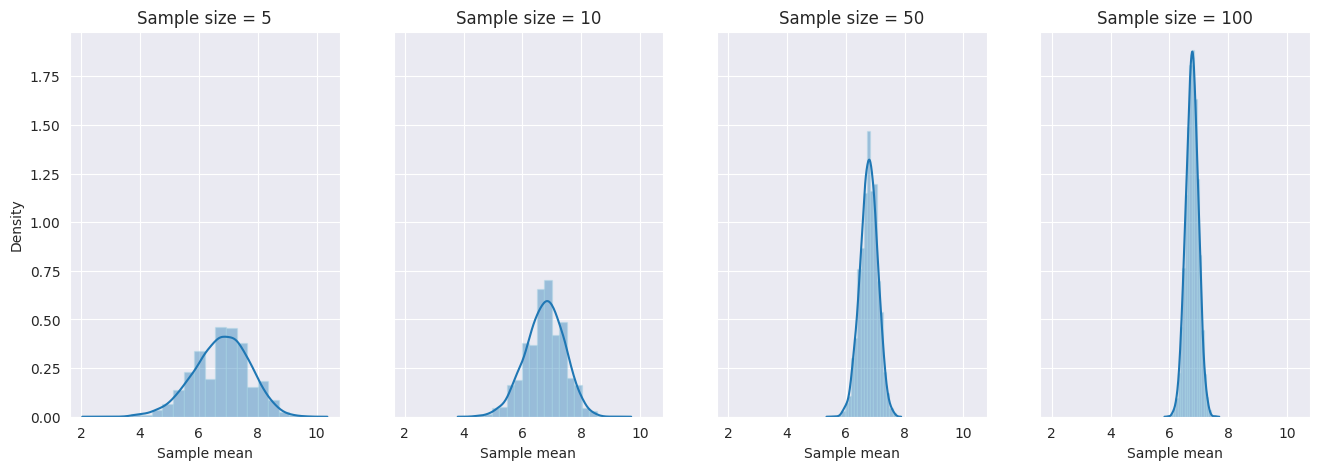

In [ ]:
# preparing a figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1,ncols=4,figsize=(16,5),sharex=True,sharey=True)

# getting the data
fftax_ch = ess.loc[(ess.cntry=="CH")&~(ess[var].isna()),var]
# determine sample sizes
sample_size = [5, 10, 50, 100]

for n, ax in zip(sample_size,[ax1, ax2, ax3, ax4]):

    # for each sample size, simulate 10000 random sampels and calculate their means
    means = []
    for i in range(0,10000):
        sample = np.random.choice(fftax_ch, size=n, replace=True)
        mean = np.mean(sample)
        means.append(mean)

    # plotting the distribution of sample means for each sample size
    sns.distplot(means,bins=20,kde=True,hist_kws={"density":True,"ec":"lightblue"}, kde_kws={"bw":0.2},ax=ax,)
    ax.set_xlabel("Sample mean")
    ax.set_title(f"Sample size = {n}")

In the histograms provided above, it's evident that for smaller sample sizes, the skewness of the underlying sampling distribution is still noticeable. However, as we move towards larger sample sizes, the distribution of sample means approaches a nearly normal distribution. It's worth noting, however, that while the central limit theorem may apply, the mean isn't always the most suitable measure of central tendency for all types of data. Even if the underlying data distribution is highly skewed, the median might serve as a more accurate representation of central tendency. In such cases, opting for a non-parametric test would be a more appropriate choice.

m = np.mean([ess[ess.cntry==c].shape[0] for c in ess.cntry.unique()])
print(f"Countries' mean sample size: {m:.2f}")

We are fortunate to have a very large sample size. Additionally, due to the fixed answer scales used in this survey, the presence of strong outliers that could potentially distort the calculated mean can be excluded. Therefore, it is reasonable to assume that the normality assumption holds in our example.

However, what should we do if this assumption is not met? For instance, if our sample size were too small, or if the sample distribution displays outliers, skewness, or heavy-tails? This is a frequently overlooked consideration. I'd like to share an insightful [blog post](https://garstats.wordpress.com/2016/05/02/robust-effect-sizes-for-2-independent-groups/) on this matter, which rightly states, *"When I was an undergrad, I was told that beyond a certain sample size (n=30 if I recall correctly), t-tests and ANOVAs are fine.* ***This was a lie.***"

There are more robust alternatives known as non-parametric rank-based tests. They earn this name because they do not rely on assumptions about the shape of the underlying distribution; instead, they compare the ranks of different groups. A non-parametric alternative to the two-sample t-test is the [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test), which assesses if one group is stochastically greater than the other. It accomplishes this by ranking the data from both groups and determining how often any observation from one group has a higher rank than any observation from the other group. This rank sum is referred to as the U statistic, which is approximately normally distributed and, consequently, can be assigned a z-score and a corresponding p-value. It is important to note that for this test to hold, it also assumes equal variance of the underlying populations of the samples. You can refer to [this resource](http://www.statisticslectures.com/topics/mannwhitneyu/) for an illustrative example.

Allow me to demonstrate that the Mann-Whitney U test will yield results that are roughly equivalent to those of a t-test on ranked normally distributed data.

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, rankdata

# making some random data
a = np.random.normal(0.0, 1.0, size=1000)
b = np.random.normal(0.1, 1.0, size=1000)
# perform a Mann-Whitney U test, the continuity correction should only be applied for non-continoius data to handle ties
U, p_mw =  mannwhitneyu(a,b,use_continuity=False,alternative="two-sided")

#rank data
ranked = rankdata(np.append(a,b),method="average")
ranked_a = ranked[:len(a)]
ranked_b = ranked[len(a):]
# performing a t-test on ranks
t, p_t = ttest_ind(ranked_a,ranked_b,equal_var=True)

print(f"Mann-Whitney U test p-value: {p_mw}\nt-test p-value: {p_t}")

Mann-Whitney U test p-value: 0.0026363194305942927
t-test p-value: 0.0026166127959830238


I'd like to employ both the t-test and the Mann-Whitney U test to compare their outcomes. While the p-value assists in determining the statistical significance of a difference between groups, it does not provide insight into the magnitude of the difference. Given that the survey responses lack a common unit, it is prudent to examine standardized effect sizes.

A standardized difference in means can be quantified using [Cohen's $d$](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d), which is calculated as the difference in group means divided by the pooled standard deviation. This calculation assumes equal variance and may exhibit positive bias for small sample sizes, though this is unlikely to be problematic in our case. An alternative with less bias is [Hedge's $g$](https://en.wikipedia.org/wiki/Effect_size#Hedges'_g), although it is not as commonly employed. I will utilize $d$ in this context because it comes with widely accepted benchmarks: 0.2 signifies a small effect, 0.5 a medium effect, and 0.8 a large effect. It's important to note that these benchmarks are conventional and may require different interpretations in specific cases.

The effect size directly derived from the Mann-Whitney U test is known as the [common language effect size](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Common_language_effect_size), denoted as $f = \frac{U}{nm}$, where n and m represent the sizes of the two groups. Essentially, it informs us about the proportion of pairs supporting one group being stochastically greater than the other, out of all possible pairs between both groups. A value of 0.5 implies the groups are stochastically equivalent, while a value of 1.0 indicates one group is entirely greater than the other. Interestingly, this metric aligns with the area under the receiver operating curve (AUC-ROC), a commonly used evaluation metric for machine learning models. Additionally, we can define a rank biserial correlation as $r = 1 - \frac{2U}{n m}$. If we treat this correlation in a similar manner to Pearson's correlation, it can be transformed into a Cohen's $d$ using the equation $d =  \frac{2r}{\sqrt{1-r^{2}}}$. I want to note that I'm not entirely certain if this transformation is valid for a rank biserial correlation, and I'm using it here for comparison purposes only - please don't quote me on this.

In [ ]:
# I need to quickly modify Scipy.stats' mannwhitneyu function so that it returns the U statistic for both groups, not just the smaller one

from scipy.stats import tiecorrect, distributions
def mannwhitneyu(x, y, use_continuity=True, alternative=None):
    """
    EDIT: My modified version that returns the U statistic for both groups, not just the smaller one

    Compute the Mann-Whitney rank test on samples x and y.
    Parameters
    ----------
    x, y : array_like
        Array of samples, should be one-dimensional.
    use_continuity : bool, optional
            Whether a continuity correction (1/2.) should be taken into
            account. Default is True.
    alternative : None (deprecated), 'less', 'two-sided', or 'greater'
            Whether to get the p-value for the one-sided hypothesis ('less'
            or 'greater') or for the two-sided hypothesis ('two-sided').
            Defaults to None, which results in a p-value half the size of
            the 'two-sided' p-value and a different U statistic. The
            default behavior is not the same as using 'less' or 'greater':
            it only exists for backward compatibility and is deprecated.
    Returns
    -------
    statistic : float
        The Mann-Whitney U statistic, equal to min(U for x, U for y) if
        `alternative` is equal to None (deprecated; exists for backward
        compatibility), and U for y otherwise.

    U1: The Mann-Whitney U statistic for x

    U2: The Mann-Whitney U statistic for y

    pvalue : float
        p-value assuming an asymptotic normal distribution. One-sided or
        two-sided, depending on the choice of `alternative`.
    Notes
    -----
    Use only when the number of observation in each sample is > 20 and
    you have 2 independent samples of ranks. Mann-Whitney U is
    significant if the u-obtained is LESS THAN or equal to the critical
    value of U.
    This test corrects for ties and by default uses a continuity correction.
    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/Mann-Whitney_U_test
    .. [2] H.B. Mann and D.R. Whitney, "On a Test of Whether one of Two Random
           Variables is Stochastically Larger than the Other," The Annals of
           Mathematical Statistics, vol. 18, no. 1, pp. 50-60, 1947.
    """
    if alternative is None:
        warnings.warn("Calling `mannwhitneyu` without specifying "
                      "`alternative` is deprecated.", DeprecationWarning)

    x = np.asarray(x)
    y = np.asarray(y)
    n1 = len(x)
    n2 = len(y)
    ranked = rankdata(np.concatenate((x, y)))
    rankx = ranked[0:n1]  # get the x-ranks
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
    u2 = n1*n2 - u1  # remainder is U for y
    T = tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in mannwhitneyu')
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)

    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    if alternative is None or alternative == 'two-sided':
        bigu = max(u1, u2)
    elif alternative == 'less':
        bigu = u1
    elif alternative == 'greater':
        bigu = u2
    else:
        raise ValueError("alternative should be None, 'less', 'greater' "
                         "or 'two-sided'")

    z = (bigu - meanrank) / sd
    if alternative is None:
        # This behavior, equal to half the size of the two-sided
        # p-value, is deprecated.
        p = distributions.norm.sf(abs(z))
    elif alternative == 'two-sided':
        p = 2 * distributions.norm.sf(abs(z))
    else:
        p = distributions.norm.sf(z)

    u = u2
    # This behavior is deprecated.
    if alternative is None:
        u = min(u1, u2)

    return u, u1, u2, p


### Performing test <a name="stats2"></a>
<a id="tests" ></a>
Let's proceed with the tests. We'll begin by conducting a Levene's test to assess the equality of variances in the previously mentioned examples. If the p-value is lower than our selected significance level of 0.05, we will conclude that the variances of the samples are not equal.

In [ ]:
from scipy.stats import levene
# perform Leven's test on the samples of interest
for var in ["inctxff","lrscale","imdfetn","ccrdprs"]:
    a = ess.loc[(ess.cntry=="CH")&~(ess[var].isna()),var]
    b = ess.loc[(ess.cntry=="DE")&~(ess[var].isna()),var]
    stat, p = levene(a,b)
    print(f"p-value for Leven's test on variable {var}: {p}")

p-value for Leven's test on variable inctxff: 0.009058596321913075
p-value for Leven's test on variable lrscale: 1.7436131304764693e-07
p-value for Leven's test on variable imdfetn: 0.593544218563202
p-value for Leven's test on variable ccrdprs: 0.007339874178505959


In all tests except the first and last one, the p-value is below 0.05, indicating a general indication of unequal variances. This implies that for the t-test, we'll opt for Welch's version instead of the Student's version. Unfortunately, for the Mann-Whitney U test, this violation of assumption cannot be rectified.

In [ ]:
# implement the function for the tests
def stats_tests(country_a="Switzerland",country_b="Germany", var_list=["inctxff","lrscale","imdfetn","ccrdprs"],alpha=0.05):
    """
    Performs Welch's t-test and Mann-Whitney U test on two countrie's
    answers to the questions corresponding to the supplied variables.

    Parameters
    ----------
    country_a, country_b : string,
            Names of the countries to compare
    var_list : list of strings
            List with variable names to compare
    alpha : float in range [0,1]
            Significance level alpha

    Returns
    -------
    None, just prints the results
    """

    cntry_dict = dict(zip(
                          ["Austria","Belgium","Switzerland","Czech republic","Germany","Estonia","Spain",
                           "Finland","France","United Kingdom","Hungary","Ireland","Israel","Iceland","Italy","Lithuania",
                           "Netherlands","Norway","Poland","Portugal","Russia","Sweden","Slovenia"],
                          ['AT', 'BE', 'CH', 'CZ', 'DE', 'EE', 'ES', 'FI', 'FR', 'GB', 'HU','IE', 'IL',
                           'IS', 'IT', 'LT', 'NL', 'NO', 'PL', 'PT', 'RU', 'SE','SI']))

    # adjust significance level alpha with the Bonferoni correction
    alpha_cor = alpha / len(var_list)

    # for each comparison
    for var in var_list:
        # get data (without NaNs)
        a = ess.loc[(ess.cntry==cntry_dict[country_a])&~(ess[var].isna()),var]
        b = ess.loc[(ess.cntry==cntry_dict[country_b])&~(ess[var].isna()),var]

        # sample sizes
        n = len(country_a)
        m = len(country_b)

        # perform Welch's version of the t-test to account for possibly unequal variances
        t, p_t = ttest_ind(a, b, equal_var=False)
        # calculate Cohen's d from t statistic
        d_t = t * np.sqrt(((n+m)/(n*m))*((n+m)/(n+m-2)))

        # We could also calculate d directly but this way there would be no correction
        # for unequal variance which I hope is accounted for through Welch's t-test.
        # The differences are negligible anyway, usually in the order of +/- 0.005.
        # s = np.sqrt(((n-1)*np.var(a)+(m-1)*np.var(b))/(n+m))
        # d = (np.mean(a)-np.mean(b))/s

        # perform Mann-Whitney U test with continuety corrertion
        U, U1, U2, p_mw = mannwhitneyu(a, b, use_continuity=False,alternative="two-sided")
        # calculate common language effect size
        f = U1/(n*m)
        # calculate rank biserial correlation
        r = 1- (2*U1/(n*m))
        # convert r to d (don't do this step for your own research without consulting a statistician)
        d_mw = 2*r/np.sqrt(1-r**2)

        # print the test results
        print("#----------------------------------------------------------------#")
        question = variables.query("Name == @var").Label.values[0]
        print(f"Question: {question}")
        print(f"Tests for {country_a} vs. {country_b} at significance level alpha={alpha}\nBonferroni-corrected alpha: {alpha_cor}\n")
        print(f"Results of two-independent-sample Welch's t-test:\nd: {d_t}\np-value: {p_t}")
        if p_t < alpha_cor:
            print("The effect IS statistically significant.\n")
        else:
            print("The effect IS NOT statistically significant.\n")
        print(f"Mann-Whitney U test:\nf: {f}\nd: {d_mw}\np-value: {p_mw}")
        if p_mw < alpha_cor:
            print("The effect IS statistically significant.\n")
        else:
            print("The effect IS NOT statistically significant.\n")
        print("#----------------------------------------------------------------#")


In [ ]:
# let's perform tests on the answers of German and Swedish respondents
stats_tests(country_a="Switzerland",country_b="Germany", var_list=["inctxff","lrscale","imdfetn","ccrdprs"],alpha=0.05)

#----------------------------------------------------------------#
Question: Favour increase taxes on fossil fuels to reduce climate change
Tests for Switzerland vs. Germany at significance level alpha=0.05
Bonferroni-corrected alpha: 0.0125

Results of two-independent-sample Welch's t-test:
d: 3.3636770507183473
p-value: 6.358844881404073e-11
The effect IS statistically significant.

Mann-Whitney U test:
f: 23974.5
d: nan
p-value: 5.278254523252312e-11
The effect IS statistically significant.

#----------------------------------------------------------------#
#----------------------------------------------------------------#
Question: Placement on left right scale
Tests for Switzerland vs. Germany at significance level alpha=0.05
Bonferroni-corrected alpha: 0.0125

Results of two-independent-sample Welch's t-test:
d: 5.166859298675609
p-value: 1.919098313497835e-23
The effect IS statistically significant.

Mann-Whitney U test:
f: 20921.272727272728
d: nan
p-value: 8.1140366124142895e-

Both types of tests concur on the matter of significance. However, for non-significant results, the calculated p-values can exhibit notable disparities. This discrepancy is not particularly surprising, given that we already know the Mann-Whitney U test's assumption of equal variances is violated, and the two tests are evaluating different null hypotheses (no difference in **means** for the t-test, as opposed to **medians** for the Mann-Whitney U test). Furthermore, parametric tests may demonstrate greater statistical power when the data aligns with the tests' assumptions, as the test leverages knowledge of the underlying distribution. In the case of Welch's t-test, all assumptions appear to be satisfied.

The estimated effect sizes from both types of tests are relatively similar, differing by no more than 0.1 in this case. Among the Swiss and German respondents in this survey, there is a statistically significant difference in their level of support for the climate change mitigation policy as well as their sense of personal responsibility for mitigating climate change. However, Swedes are more inclined than Germans to believe that immigrants contribute to making the country a better place to live ($d$ = -0.47, indicating a small to medium effect), and they express greater trust in the United Nations ($d$ = -0.61, signifying a medium effect).

Let's consider another pairing: What are the opinions of Italians and French individuals regarding the question *"How important is it to be successful and have one's achievements recognized by others?"*

In [ ]:
stats_tests(country_a="Italy",country_b="France", var_list=["ipsuces"],alpha=0.05)

#----------------------------------------------------------------#
Question: Important to be successful and that people recognize achievements
Tests for Italy vs. France at significance level alpha=0.05
Bonferroni-corrected alpha: 0.05

Results of two-independent-sample Welch's t-test:
d: 30.51354898896086
p-value: 0.0
The effect IS statistically significant.

Mann-Whitney U test:
f: 31201.966666666667
d: nan
p-value: 0.0
The effect IS statistically significant.

#----------------------------------------------------------------#


Impressive! A p-value of zero and a Cohen's $d$ of 1.44 indicate a substantial effect. It appears that Italian respondents in this survey place considerably more importance on being successful and having their achievements acknowledged by others.

Feel free to explore any question and country combination that interests you! In the next section, we'll delve into building machine learning models to forecast how individuals might respond to specific questions and aim to elucidate these predictions.

## Employing Machine Learning for Prediction <a name="ml"></a>

As we observed in the preceding sections, individuals who respond to certain questions in a particular manner tend to also answer other questions in a consistent way. This suggests the presence of distinct personality traits, attitudes, or opinions among the survey respondents. Can we leverage these patterns to make predictions about how people feel about specific topics, based on their given responses?

In this instance, I aim to predict the extent to which respondents support or oppose a climate change mitigation policy involving a tax on fossil fuels. This constitutes a regression problem that can benefit from the application of machine learning algorithms. Typically, we would also be interested in understanding the factors that play a role in making such predictions. While linear models provide relatively accessible information in this regard, they may not always be sophisticated enough to capture complex relationships in the data. On the contrary, modern ensemble algorithms are more potent predictive tools, but their internal complexity often renders it challenging to explain their predictions, leading them to be labeled as black-box models. Nonetheless, interpretability can be a crucial factor, and European Union regulations even mandate a [right to explanation](https://ora.ox.ac.uk/objects/uuid:593169ee-0457-4051-9337-e007064cf67c) for algorithmic decision-making. To quote another insightful [blogpost](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d): *"If you ask me to swallow a black pill without telling me what’s in it, I certainly don’t want to swallow it. The interpretability of a model is like the label on a drug bottle."*

In this context, I will compare both approaches and endeavor to provide explanations for predictions using [SHAP values](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf).

### Data preparation <a name="ml1"></a>
Now, let's consider how to preprocess the data for machine learning. To begin, let's address the issue of outliers. In the responses ranging from x to y, outliers are unlikely to be present. However, the four continuous variables—news consumption, internet usage, age, and years of education—may potentially include outliers. We'll visually identify them in the plots below.

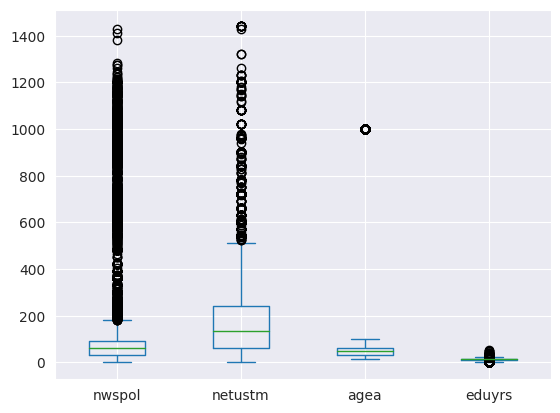

In [ ]:
# detecting outliers for the continuous variables
_ = ess[variables.query("Scale_type == \"continuous\"").Name].plot(kind="box")

The outliers observed in the variables `nwspol` (news consumption), `netustm` (internet usage), and `eduyrs` (years of education) likely have meaningful explanations, and it is advisable not to remove them. Some individuals may have a tendency to browse or study extensively, which provides valuable information. However, ages exceeding 1000 years are clearly unrealistic, so we will exclude entries beyond that range. Additionally, we should eliminate the variables `sbsrnen` and `banhhap`, which both correspond to the question *"To what extent are you in favor or against the following policies in [country] to reduce climate change: increasing fossil-fuel taxation?"* This is because they closely mirror our main variable of interest, potentially leading to data leakage. Finally, any rows lacking a labeled fossil fuel taxation preference value should be removed.

In [ ]:
# removing age outlier
ess.agea.where(ess.agea<100,np.NaN,inplace=True)

# removing variable sbsrnen
ess.drop("sbsrnen",axis=1,inplace=True)

# removing variable banhhap
ess.drop("banhhap",axis=1,inplace=True)

# removing rows with missing policy preference value
ess = ess[~ess.inctxff.isna()]

Now, we'll separate a hold-out set from our dataset. Given the varying number of respondents across different countries and genders (as shown in the plot below), it's important to perform a stratified split. This ensures that both the training and test datasets maintain a similar representation from each country and gender group.

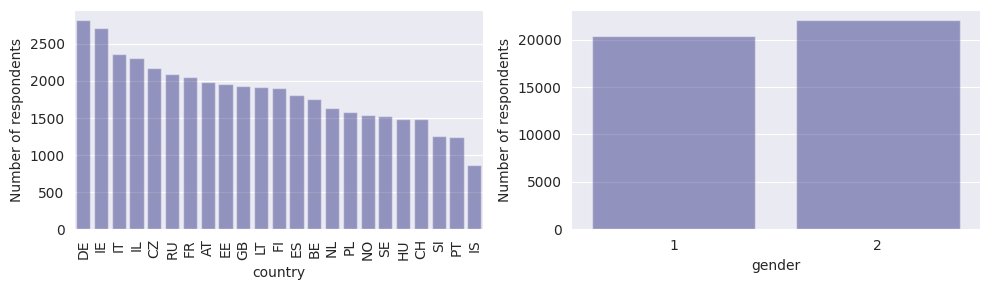

In [ ]:
# plotting respondents per country
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.barplot(x=ess.cntry.value_counts().index, y=ess.cntry.value_counts(),color="navy",alpha=0.4,ax=ax1)
sns.barplot(x=ess.gndr.value_counts().index,y=ess.gndr.value_counts(),color="navy",alpha=0.4,ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation="vertical")
ax1.set_xlabel("country")
ax2.set_xlabel("gender")
for ax in [ax1,ax2]:
    ax.set_ylabel("Number of respondents")
plt.tight_layout()

In [ ]:
# creating a stratified split of training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ess.drop("inctxff",axis=1),
                                                    ess.inctxff,
                                                    stratify=ess[["cntry","gndr"]],
                                                    test_size=0.25, random_state=42)

There are still approximately 150 variables remaining. Many of these are likely not strongly associated with a person's climate change policy preferences. Removing uninformative features can reduce computational costs and decrease the data's dimensionality. As the number of dimensions increases, the feature space becomes less densely populated. This means that new data points are more likely to be farther away from the learned training examples, which can make predictions more challenging. This issue is often referred to as the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_learning).
We can calculate Pearson's correlation to assess how many features are at least weakly correlated with climate change policy preferences:

In [ ]:
# calculate correlation
cor = ess.corr().inctxff
highcor = cor[np.abs(cor)>=0.15].sort_values()
print(f"{len(highcor)} out of {len(cor)} features have a correlation with policy preferences >= 0.15")

26 out of 153 features have a correlation with policy preferences >= 0.15


While removing features may not necessarily lead to a significant improvement in prediction quality, it does simplify the problem. Given our interest in identifying the most influential features for predicting climate change mitigation policy support, I believe it's a reasonable step to take here. If our main goal was dimensionality reduction, we could explore unsupervised methods like [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis), although we won't delve into that in this context.

Feature selection can be approached in various ways. Some models provide methods (such as feature importance from decision trees or coefficients from [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)-regularized linear regression)) to identify important features, but this typically involves training an additional model prior to the main one. A simpler approach involves employing univariate statistical tests on individual features, which do not consider feature interactions. In our case, we'll proceed by selecting the top 50 highest-scoring features.

At this stage, we'll also perform One-Hot encoding on the categorical variables (country and gender) using Panda's `get_dummies()` function, as opposed to Scikit-Learn's `OneHotEncoder`.

In [ ]:
X_train = pd.get_dummies(X_train,columns=["cntry","gndr"])
X_test = pd.get_dummies(X_test,columns=["cntry","gndr"])

Next, it's important to consider standardizing the data, which involves scaling it to have a mean of zero and a standard deviation of one. This is beneficial for linear models, as they tend to perform better when working with data that are on similar scales. Additionally, standardization allows for a direct comparison of coefficients in the linear model, making them a useful measure of feature importance. While tree-based methods (like the gradient boosted ensemble we'll use later) are less sensitive to scale, standardizing the data won't have any adverse effects. It's worth noting that the default `StandardScaler` in Sci-kit Learn may not handle outliers well. Therefore, we'll opt for a `PowerTransformer` instead, which not only transforms the data to a Gaussian-like distribution but also applies zero-mean-unit-variance normalization.

When it comes to missing values (NaNs), we have two options to consider: we can either remove the rows containing missing values or impute them. Opting to drop rows with missing values would result in the loss of not just one answer, but an entire respondent, who may have provided valid answers to many other questions. As a first step, I would recommend trying to impute the missing values. Given that we've observed some answers are distributed in a somewhat skewed manner, I will use the column median for imputation rather than the mean.

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# getting column/variable names for the different preprocessing operations
num = X_train.loc[:,"nwspol":"impfun"].columns
cat = X_train.loc[:,"cntry_AT":"gndr_2"].columns

# setting up the preprocessing pipeline with imputing and power-tranforming for numerical values
preprocessing = ColumnTransformer(transformers=[
    ("numpipe",Pipeline(steps=[
              ("impute",SimpleImputer(strategy="median")),
              ("transform",PowerTransformer(standardize=True))
                           ]),num),
    ("onehot","passthrough",cat)
])


# since we do not have any hyper-parameters to tune within the preprocessing,
# we will preprocess the data here and not within a single complete pipeine
# so that we save time in the gridsearch
X_train_prep = pd.DataFrame(preprocessing.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_prep = pd.DataFrame(preprocessing.transform(X_test), columns=X_test.columns,index=X_test.index)


We require a method to retrieve the names of the selected features:

In [ ]:
select = SelectKBest(score_func=f_regression,k=50).fit(X_train_prep,y_train)
# get the indices of the 50 highest scores
idx = select.scores_.argsort()[-50:]
# get the corresponding feature names
selected_features = X_train_prep.columns[idx]
print(selected_features)

Index(['elgngas', 'atcherp', 'inprdsc', 'lknemny', 'hinctnta', 'ipstrgv',
       'netusoft', 'imsclbn', 'pplfair', 'sbeqsoc', 'freehms', 'euftf',
       'polintr', 'cptppola', 'rfgfrpc', 'rfgbfml', 'bennent', 'slvpens',
       'ccnthum', 'stfgov', 'imsmetn', 'wrenexp', 'eduyrs', 'actrolga',
       'cflsenr', 'elgcoal', 'ppltrst', 'stfeco', 'trstun', 'hincfel',
       'ownrdcc', 'gvrfgap', 'wrclmch', 'trstep', 'clmthgt2', 'lkredcc',
       'hmsacld', 'stfdem', 'impcntr', 'psppsgva', 'trstlgl', 'imwbcnt',
       'imbgeco', 'trstprt', 'trstprl', 'imueclt', 'imdfetn', 'psppipla',
       'trstplt', 'ccrdprs'],
      dtype='object')


### Interpretation of linear models <a name="ml2"></a>
With all the necessary preprocessing in place, we are ready to train the first model. Let's begin with an elastic-net-regularized linear regression.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# combining the feature selection with the regression model
regressor = Pipeline(steps=[
    ("select",SelectKBest(score_func=f_regression,k=50)),
    ("reg",ElasticNet(random_state=42)),
])

# hyper-parameter options for optimization
param_grid = {"reg__alpha": np.logspace(-3,2,6),
              "reg__l1_ratio": [0.0,0.25,0.5,0.75]}

# performing a grid search cross validation for hyper-paramter optimization
lin_grid = GridSearchCV(regressor,param_grid=param_grid,
                        scoring="neg_mean_absolute_error",
                        n_jobs=-1, cv=5,verbose=0).fit(X_train_prep,y_train)

Let's check out how the performance of the linear model?

In [ ]:
from sklearn.metrics import mean_absolute_error

ypred = lin_grid.predict(X_test_prep)
test_err = mean_absolute_error(y_test, ypred)
print(f"Best parameters: {lin_grid.best_params_}\n\
Cross-validation mean absolute error: {-1*lin_grid.best_score_}\n\
Test mean absolute error: {test_err}")

Best parameters: {'reg__alpha': 0.001, 'reg__l1_ratio': 0.0}
Cross-validation mean absolute error: 0.9440862212485369
Test mean absolute error: 0.9442398123649124


The linear model shows a mean absolute error of 0.94 when predicting support for the climate change mitigation policy on a scale of 1 to 5. This provides a solid starting point, and we'll aim to refine this further in subsequent steps. Next, let's delve into which features carry the most and least influence on people's policy preferences. In linear models, we can directly examine the coefficients:

In [ ]:
# get features that were selected
selected_features = X_train_prep.columns[lin_grid
                                         .best_estimator_
                                         .named_steps['select']
                                         .scores_.argsort()[-50:]].tolist()

# bring them in the right order so that they'll match the coefficients' order
ordered_features = [f for f in X_train_prep.columns if f in selected_features]

# the selected dummy variable "cntry_RU" doesn't exist is the variables data frame yet so we add it
variables = variables.append(
    pd.DataFrame(np.array(["cntry_RU","Living in Russia",None,None,None,None,None,None,None,None,]).reshape(-1,10),
                 columns=variables.columns),
    ignore_index=True
)

# get the trained model's coefficients
coef = lin_grid.best_estimator_.named_steps['reg'].coef_

# put it all in a data frame
features = pd.DataFrame(sorted(zip(coef,
                                   ordered_features,
                                   variables.query("Name in @ordered_features").Label,),
                               reverse=True),
                        columns=["coefficient","feature","question"])

# look at the two most supportive and two least supportive features
features.iloc[[0,1,2,-3,-2,-1]]

,coefficient,feature,question
0,0.100527,wrclmch,How worried about climate change
1,0.078383,hmsacld,Gay and lesbian couples right to adopt children
2,0.071200,ccrdprs,To what extent feel personal responsibility to...
47,-0.063833,ipstrgv,Important that government is strong and ensure...
48,-0.065877,elgcoal,How much electricity in [country] should be ge...
49,-0.106216,wrenexp,"How worried, energy too expensive for many people"


Above, we observe that the three most influential features impacting people's support for the policy are their levels of concern about climate change ('wrclmch') and their stance on the right of gay couples to adopt children ('hmsacld'), and their sense of responsibility to combat clima te change 'ccrdprs'. An increased worry about climate change and feeling personally responsible to fight it, leads to higher support for the climate change mitigation policy, which aligns with expectations. What's particularly noteworthy is that a positive stance on the right of gay couples to adopt children is also a significant predictor of support. Let's quantify the contribution of each factor. Thankfully, there's a convenient Python library called `eli5` that can provide this information effortlessly. Simply by providing it with the trained estimator and the feature names, it will display the coefficients, including the intercept labeled `<BIAS>`:

In [ ]:
#!pip install eli5

In [ ]:
import eli5
eli5.show_weights(lin_grid.best_estimator_,feature_names=X_train_prep.columns.values)

Weight?,Feature
+2.772,<BIAS>
+0.101,wrclmch
+0.078,hmsacld
+0.071,ccrdprs
+0.070,ownrdcc
+0.064,ccnthum
+0.062,gvrfgap
+0.053,imdfetn
+0.051,sbeqsoc
+0.051,lkredcc


With the obtained coefficients, we can further analyze how each response from an individual respondent influences their predicted climate change policy preference score. Let's examine a randomly selected individual:

In [ ]:
# eli5 can't predict with pipelines so we'll do the feature selection and model train again manually
select = lin_grid.best_estimator_.named_steps['select']
X_train_sel = pd.DataFrame(select.transform(X_train_prep),columns=ordered_features,index=X_train_prep.index)
lin_reg = ElasticNet(alpha=0.01, l1_ratio=0.25,random_state=42).fit(X_train_sel,y_train)
feature_names = variables.query("Name in @ordered_features").Label.values

# explaining the score prediction for respondent 30092
eli5.show_prediction(lin_reg, X_train_sel.iloc[30092], top=(4,3), feature_names=feature_names)

In this case, we observe that the respondent's positive attitudes towards equality for gays and lesbians has the most significant impact on their support for climate change policy, whereas their (presumably) low level of concern about climate change reduces the predicted policy support.

These calculations provide valuable and direct insights derived from the linear model. However, in more complex and high-performing models like tree-based ensembles or deep neural networks, the relationship between input features and trained parameters is not as straightforward. This makes it challenging to understand the overall influence of features on individual predictions.

To address this, there are general approaches for explaining various types of machine learning models by constructing an explanation model itself. One powerful concept is SHAP (**SH**apley **A**dditive ex**P**lanations) values. The underlying idea involves determining the contribution of each individual feature value to the prediction by calculating the marginal contribution of each feature for every possible combination of features. The average of these marginal contributions yields the SHAP value. For a deeper dive into the details and mathematics, you can refer to the [original paper](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf). Now, let's apply this concept to the linear model. Keep in mind that calculating SHAP values can be time-consuming, so we will demonstrate it on a smaller subset of the training data.

In [ ]:
#!pip install shap

In [ ]:
import shap
# shap uses javascript
shap.initjs()


# getting 100 random index numbers as our random sample
np.random.seed(42)
rnd = np.random.randint(0,X_train_sel.shape[0],100)

# creating an explainer and calculate SHAP values for our sample
exp = shap.KernelExplainer(lin_reg.predict,X_train_sel.iloc[rnd],l1_reg="num_features(50)")
shap_values = exp.shap_values(X_train_sel.iloc[rnd])

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# save the explanation model and shap values
import pickle
pickle.dump(exp,open(b"SHAP.exp","wb"))
pickle.dump(shap_values,open(b"SHAP.val","wb"))

In [ ]:
# load the explanation model and shap values
#import pickle
#exp =  pickle.load(open("SHAP.exp","rb"))
#shap_values = pickle.load(open("SHAP.val","rb"))

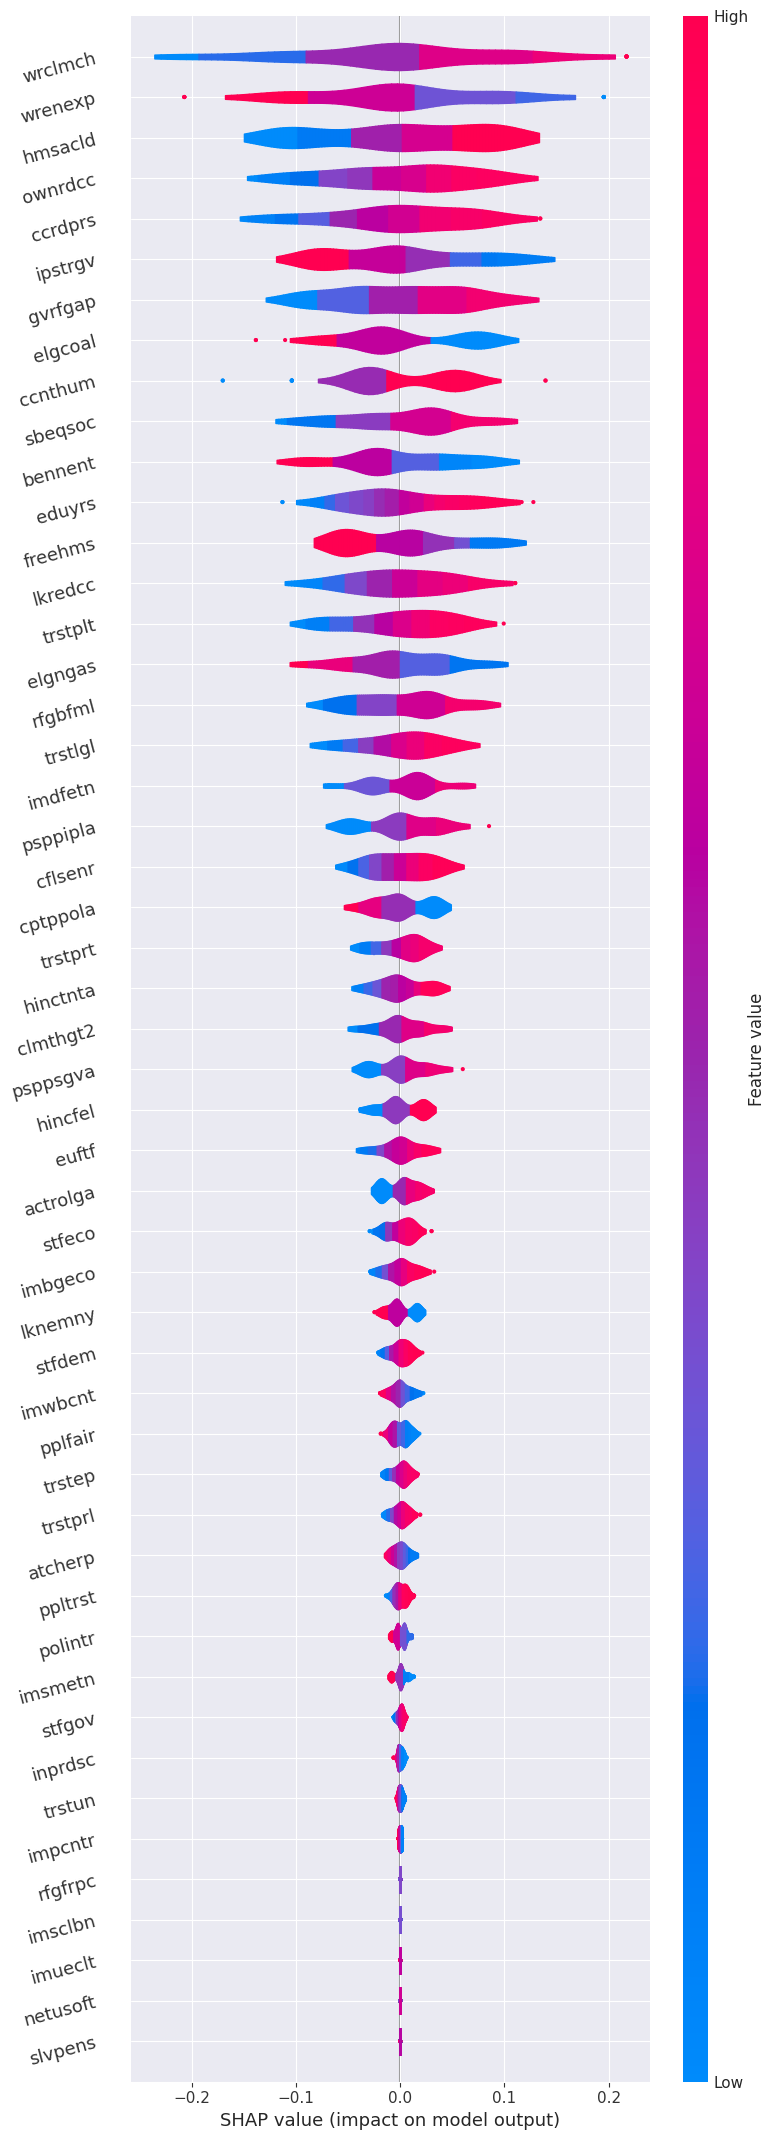

In [ ]:
# plotting the calculated SHAP values
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
plt.yticks(rotation=15)
shap.summary_plot(shap_values, X_train_sel.iloc[rnd],max_display=50, auto_size_plot=False, plot_type="violin")

In all instances, SHAP values were computed for every feature. A high SHAP value (indicated in red) indicates that, in the specific example, the feature's value had a positive impact on the calculated score when compared to a baseline score (in this case, the average policy support of all respondents in the sample). Now, we can observe that features with a substantial impact also exhibit high absolute SHAP values. For instance, the `wrclmch` feature displays both highly positive and highly negative SHAP values. This occurs because a high value of `wrclmch` (indicating strong concern about climate change) strongly contributes to their policy support, whereas a low value of `wrclmch` (indicating less concern about climate change) leads to a stronger opposition to the policy. As previously, it may be beneficial to examine individual predictions to understand how respondents' specific answers contribute to their predicted policy support score:

In [ ]:
# displaying the original and transformed values of the answers to features/questions
# with high SHAP value for one of the randomly sampled respondents
i = 5
idx = X_train_sel.iloc[rnd].iloc[i].name
high_SHAP_feats = [v for s,v in sorted(zip(np.abs(shap_values[i,:]),X_train_sel.columns.tolist()),reverse=True)][:15]
X_train.loc[[idx]].append(X_train_sel.loc[[idx]])[high_SHAP_feats].head()

,wrclmch,sbeqsoc,ccrdprs,trstplt,rfgbfml,clmthgt2,hmsacld,gvrfgap,ccnthum,imdfetn,ownrdcc,trstprt,bennent,trstlgl,actrolga
12135,2.00000,2.000000,3.000000,7.000000,2.000000,1.000000,4.0000,2.000000,3.000000,2.000000,5.000000,6.00000,4.000000,7.000000,1.000000
12135,-1.12246,-1.250478,-1.058992,1.313611,-1.201692,-1.926438,0.6599,-0.756137,-0.546125,-0.607136,0.258484,0.97729,0.420418,0.588425,-1.217853


In [ ]:
# explaining a single prediction for one of the randomly sampled respondents
# shap uses javascript
shap.initjs()
shap.force_plot(exp.expected_value, shap_values[i,:], X_train_sel.iloc[rnd].iloc[i])

As observed above, this respondent expresses a lower level of support for the policy (2.45) compared to the overall average (base value = 2.749). Their lower level of concern about climate change (`wrclmch`), reduced agreement with the notion that social benefits/services lead to a more equal society (`sbeqsoc`), and diminished sense of personal responsibility for reducing climate change (`ccrdprs`) collectively contribute to their overall reduced support for the proposed policy. On the other hand, a higher level of trust in politicians (`trstplt`) and relatively strong support for the right of gay and lesbian couples to adopt children (`hmsacld`) increase their overall support for the policy. With this universal method to elucidate the impact of features for both the overall model and individual predictions, we can now endeavor to enhance predictions with more sophisticated models.

### Interpretation of gradient-boosted ensembles <a name="ml3"></a>
Next, we will employ an ensemble of gradient-boosted decision trees using the [XGBoost algorithm](https://en.wikipedia.org/wiki/XGBoost). The concept of [gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) involves training predictors sequentially, with each new predictor aiming to fit the residual errors left by the preceding predictor.

In [ ]:
from xgboost import XGBRegressor

# combining the feature selection with the XGB regression model
regressor_xgb = Pipeline(steps=[
    ("select",SelectKBest(score_func=f_regression,k=50)),
    ("reg",XGBRegressor(booster="gbtree",n_jobs=4,random_state=42,verbosity=0)),
])

# hyper-parameter options for optimization
# since the gridsearch takes a while, I commented out the non-ideal ones I checked
param_grid = {"reg__max_depth": [5],#[4,5,6],
              "reg__learning_rate":[0.1], #[0.05,0.1,0.15],
              "reg__n_estimators": [125],}#[10,50,75,100,125,150],}

# performing a grid search cross validation for hyper-paramter optimization
xgb_grid = GridSearchCV(regressor_xgb,param_grid=param_grid,
                        scoring="neg_mean_absolute_error", n_jobs=1,
                        cv=5,verbose=0).fit(X_train_prep,y_train)

In [ ]:
ypred = xgb_grid.predict(X_test_prep)
test_err = mean_absolute_error(y_test, ypred)
print(f"Best parameters: {xgb_grid.best_params_}\n\
Cross-validation mean absolute error: {-1*xgb_grid.best_score_}\n\
Test mean absolute error: {test_err}")

Best parameters: {'reg__learning_rate': 0.1, 'reg__max_depth': 5, 'reg__n_estimators': 125}
Cross-validation mean absolute error: 0.9229905080066925
Test mean absolute error: 0.9223342530344306


The XGBoost model demonstrates a mean absolute error of approximately 0.91 when forecasting policy preferences on a scale of 0 to 5, slightly outperforming the linear model. Tree-based models also provide a method to evaluate feature importance:

In [ ]:
# getting features that were selected
selected_features_xgb = X_train_prep.columns[xgb_grid
                                         .best_estimator_
                                         .named_steps['select']
                                         .scores_.argsort()[-50:]].tolist()

# bringing them in the right order and get the correspondig questions
ordered_features_xgb = [f for f in X_train_prep.columns if f in selected_features_xgb]
feature_names_xgb = variables.query("Name in @ordered_features_xgb").Label.values

# because eli5 cannot handle pipelines, train the XGBoost model with the optimized parameeters from grid search cv
select = xgb_grid.best_estimator_.named_steps['select']
X_train_sel_xgb = pd.DataFrame(select.transform(X_train_prep),
                               columns=ordered_features_xgb,
                               index=X_train_prep.index)

xgb_reg = XGBRegressor(booster="gbtree", n_estimators=125,
                       max_depth=5, learning_rate=0.1, n_jobs=4,
                       random_state=42,verbosity=0).fit(X_train_sel_xgb,y_train)

# showing the weights associated with the features in the XGBoost model
eli5.show_weights(xgb_reg,feature_names=feature_names_xgb)

Weight,Feature
0.0892,To what extent feel personal responsibility to reduce climate change
0.0770,Political system allows people to have influence on politics
0.0566,Allow many/few immigrants of different race/ethnic group from majority
0.0328,Trust in the legal system
0.0313,Gay and lesbian couples right to adopt children
0.0307,How much electricity in [country] should be generated from coal
0.0301,"Climate change caused by natural processes, human activity, or both"
0.0299,Trust in politicians
0.0283,"How worried, energy too expensive for many people"
0.0281,Trust in political parties


The weights displayed here differ from those in a linear model. In tree-based models, feature importance is determined by assessing how many times a feature contributes to splits in the decision trees. If a feature is involved in numerous splits, it is deemed more significant for the prediction. However, this method does not indicate whether a feature has a positive or negative impact on the predicted value.

In the case of XGBoost models, estimating the contribution of each feature is a bit more intricate compared to linear models. The `eli5` library employs a technique that involves retracing the decision paths within the ensemble's trees. This process yields feature weights that collectively add up to the predicted score. Each leaf node in a tree has an output score, allowing for the assignment of an expected score to its parent node (resembling a pseudo-leaf score). The change in expected score between parent and child nodes signifies the contribution of a feature along the decision path. For more in-depth information, refer to this [blogpost](http://blog.datadive.net/interpreting-random-forests/). Let's examine an individual prediction:

In [ ]:
# explaining the score prediction for respondent 30092
eli5.show_prediction(xgb_reg, X_train_sel_xgb.iloc[30092], top=(5,4), feature_names=feature_names_xgb)

We observe that comparable features as in the linear model play a role in determining this respondent's policy preference score, although the hierarchy of importance is slightly altered. Notably, in the XGBoost model, the feature "Political system allows people to have influence on politics" makes a more substantial positive contribution, while the climate change concern feature makes a comparatively smaller negative contribution than in the linear model.

Fortunately, SHAP values offer a model-agnostic approach to assess feature contributions. We will compute them for the XGBoost model using the same sample of respondents as in the linear model to enable a direct comparison.

In [ ]:
# creating an explainer and calculate the XGBoost model's SHAP values for the same sample
exp_xgb = shap.TreeExplainer(xgb_reg,X_train_sel_xgb.iloc[rnd],feature_dependence="independent")
shap_values_xgb = exp_xgb.shap_values(X_train_sel_xgb.iloc[rnd])

In [ ]:
# saving the XGB explanation model and shap values
import pickle
pickle.dump(exp_xgb,open(b"SHAP.xgb.exp","wb"))
pickle.dump(shap_values_xgb,open(b"SHAP.xgb.val","wb"))

In [ ]:
# loading the XGBexplanation model and shap values
#import pickle
#exp =  pickle.load(open("SHAP.xgb.exp","rb"))
#shap_values = pickle.load(open("SHAP.xgb.val","rb"))

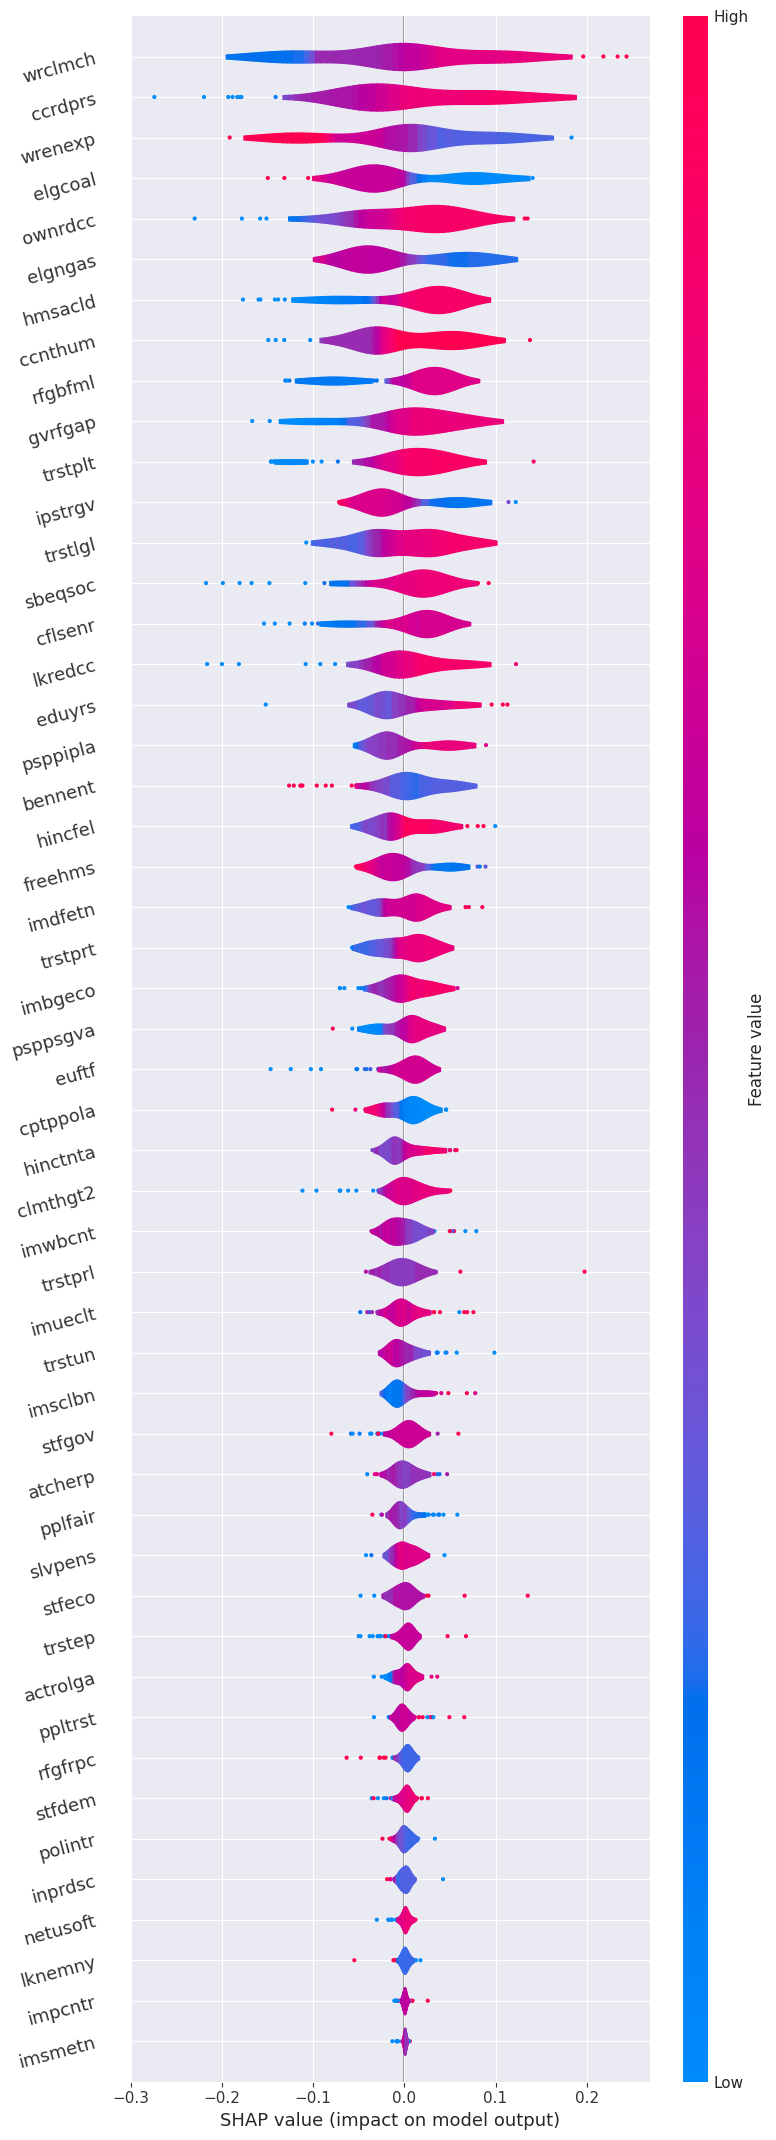

In [ ]:
# plotting the calculated SHAP values
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
plt.yticks(rotation=15)
shap.summary_plot(shap_values_xgb, X_train_sel_xgb.iloc[rnd],max_display=50, auto_size_plot=False, plot_type="violin")

In comparison to the linear model, similar features are deemed significant, although the precise order may differ. Now, let's examine the individual prediction.

In [ ]:
# displaying the original and transformed values of the answers to features/questions
# with high SHAP value for one of the randomly sampled respondents
i = 5
idx = X_train_sel_xgb.iloc[rnd].iloc[i].name
high_SHAP_feats = [v for s,v in sorted(zip(np.abs(shap_values_xgb[i,:]),X_train_sel_xgb.columns.tolist()),reverse=True)][:15]
X_train.loc[[idx]].append(X_train_sel_xgb.loc[[idx]])[high_SHAP_feats].head()

,wrclmch,rfgbfml,sbeqsoc,trstplt,clmthgt2,ccrdprs,ownrdcc,elgngas,cflsenr,imdfetn,trstlgl,hmsacld,ccnthum,elgcoal,gvrfgap
12135,2.00000,2.000000,2.000000,7.000000,1.000000,3.000000,5.000000,3.000000,7.000000,2.000000,7.000000,4.0000,3.000000,NaN,2.000000
12135,-1.12246,-1.201692,-1.250478,1.313611,-1.926438,-1.058992,0.258484,0.144636,0.293692,-0.607136,0.588425,0.6599,-0.546125,0.185798,-0.756137


In [ ]:
# explaining a single prediction of the XGBoost model for one of the randomly sampled respondents
# shap uses javascript
shap.initjs()
shap.force_plot(exp_xgb.expected_value, shap_values_xgb[i,:], X_train_sel_xgb.iloc[rnd].iloc[i])

Despite the slightly lower predicted policy preference score compared to the linear model, the contribution of each feature remains largely consistent. This is quite impressive as it demonstrates that SHAP values offer us a dependable and widely applicable means of explaining highly complex machine learning models. To a certain extent, this helps reconcile the trade-off between complex yet accurate models and simpler, interpretable ones.

## Conclusion <a name="conclusion" ></a>


In this project, we conducted a thorough [data cleaning](#data) process using the 8th European Social Survey dataset. We carefully selected relevant variables corresponding to survey questions, removed any invalid data points, and adjusted data scales, including reverse-coding when necessary.

We delved into the correlations between different questions and examined how responses were distributed across participating countries using an interactive [visualization](#viz). This analysis revealed notable patterns, such as positive correlations between xenophobia and homophobia, as well as connections between political views and climate responsibility.

Additionally, we conducted [statistical tests](#stats) to assess the significance and effect size of variations in responses between participants from different countries. For instance, we observed no significant difference in reported policy preferences between Swiss and German respondents. However, there was a substantial discrepancy in how Italian and French respondents perceived the importance of personal success and recognition.

Finally, we employed [machine learning](#ml) techniques to predict respondents' level of support for a climate change mitigation policy that proposes taxing fossil fuels, based on their answers to other questions. We compared the predictive capabilities and interpretability of linear and gradient-boosted decision tree models. We then utilized SHAP values to elucidate how each feature contributes to individual predictions for both models. Notably, factors such as being concerned about climate change, feeling a personal responsibility to combat it, and holding positive attitudes towards gay and lesbian couples' right to adopt children tended to positively influence respondents' policy support.

In future iterations of this project, we may explore alternative algorithms like random forest, naive bayes, k-nearest neighbors (KNN), and others. This will allow us to evaluate their performance in terms of prediction accuracy relative to the linear model and the XGBoost algorithm.

That concludes our project! I extend my gratitude to you for following along, and I'd like to express my thanks to the survey organizers, participants, and the developers of the various open-source tools that contributed to the success of this project.